<a href="https://colab.research.google.com/github/Shauryamishra165/ML-to-allocate-funding/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler as SS

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
!pip install -U kaleido
import kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00


# Data analysis

In [ ]:
df=pd.read_csv('/content/Country-data.csv')

In [ ]:
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<Axes: >

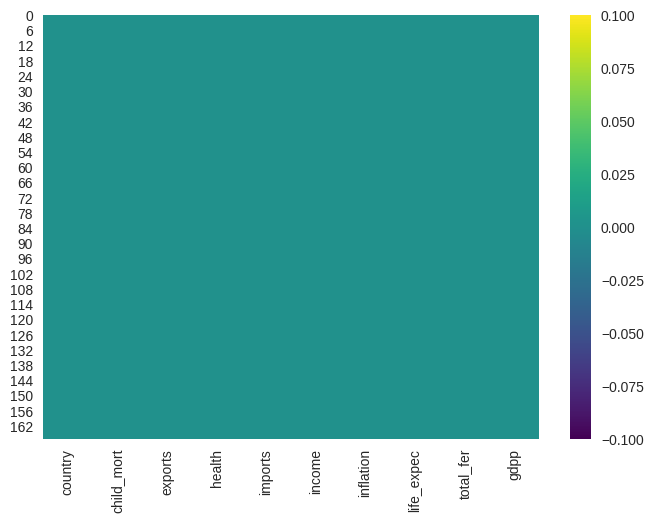

In [ ]:
sns.heatmap(df.isnull(),cmap = 'viridis')

we can see above that we dont have any null values is the dataset

In [ ]:
df.shape

(167, 10)

finding duplicate values

In [ ]:
format(len(df[df.duplicated()]))

'0'

In [ ]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

Findings:


*   small dataset
*   no missing values
*   no duplicate values
*   some outliers and skewed distribution


In [ ]:
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

# Data Visualization

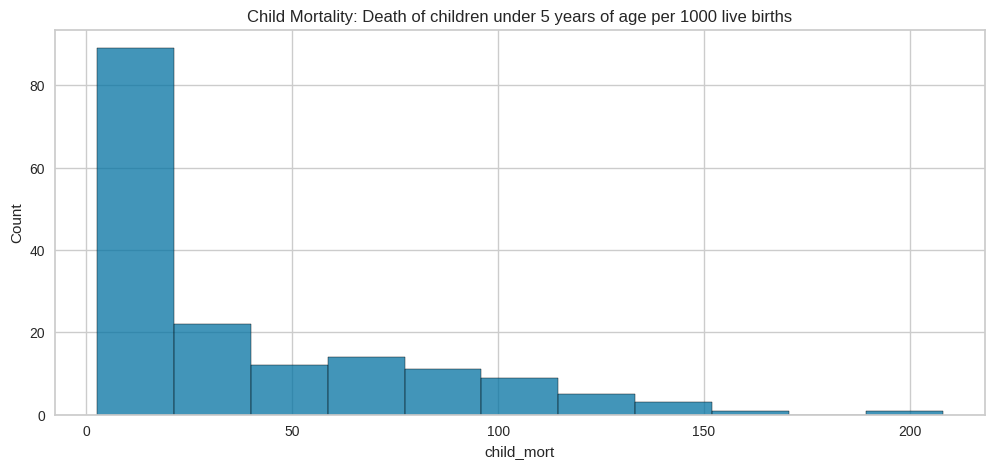

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Child Mortality: Death of children under 5 years of age per 1000 live births")
ax = sns.histplot(df["child_mort"])

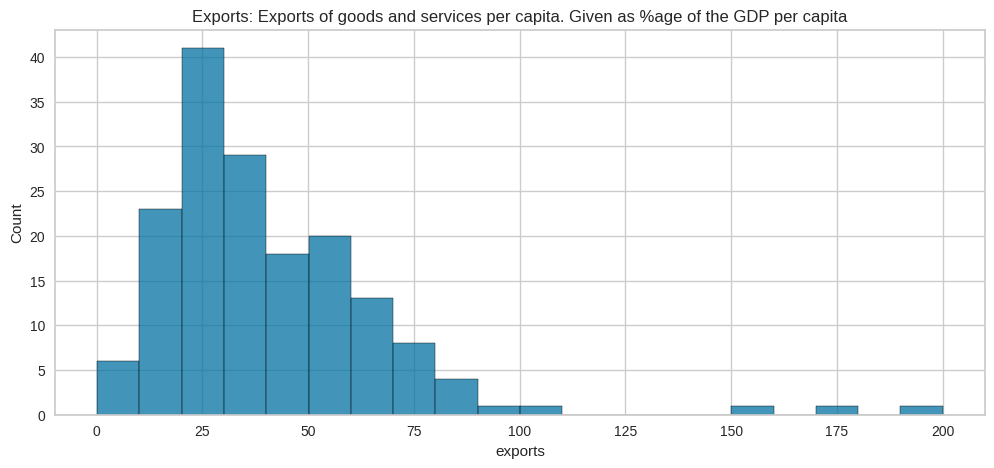

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Exports: Exports of goods and services per capita. Given as %age of the GDP per capita")
ax = sns.histplot(df["exports"])

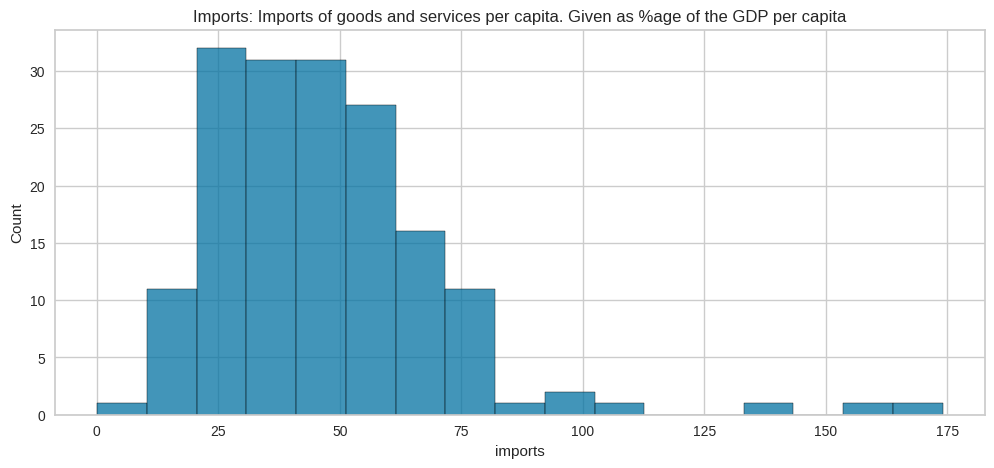

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Imports: Imports of goods and services per capita. Given as %age of the GDP per capita")
ax = sns.histplot(df["imports"])

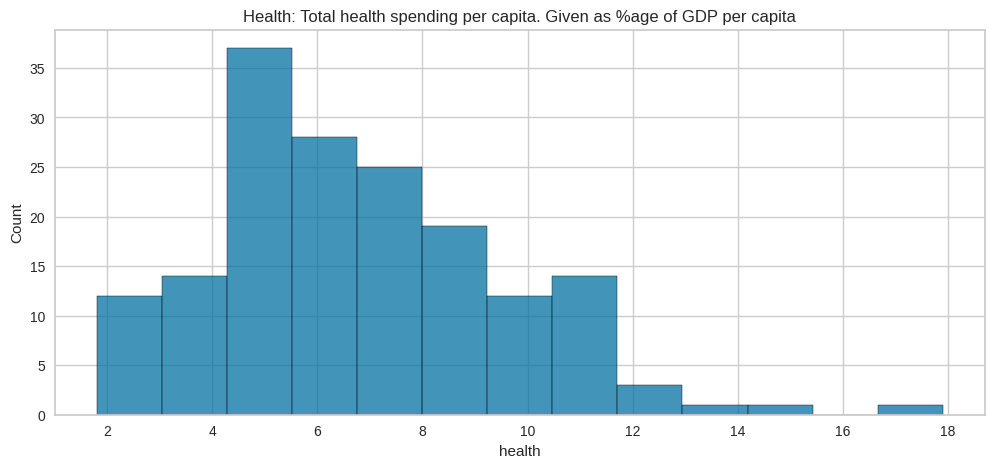

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Health: Total health spending per capita. Given as %age of GDP per capita")
ax = sns.histplot(df["health"])

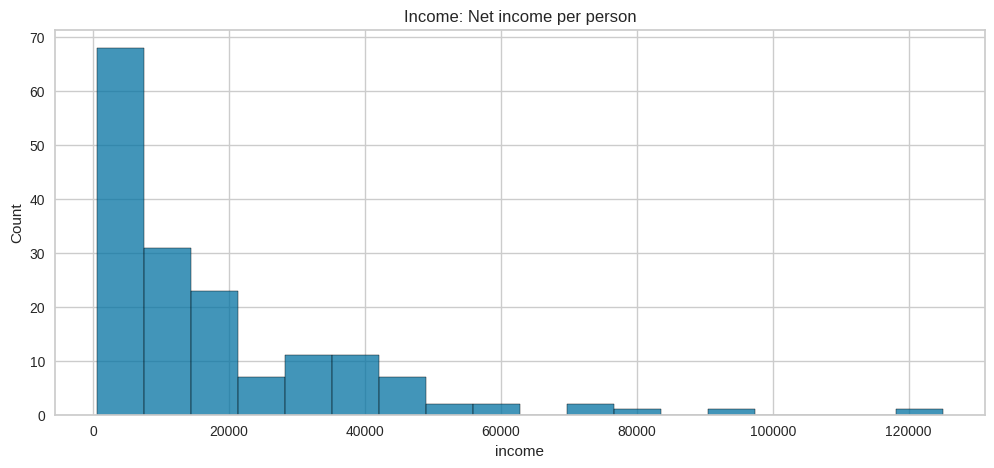

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Income: Net income per person")
ax = sns.histplot(df["income"])

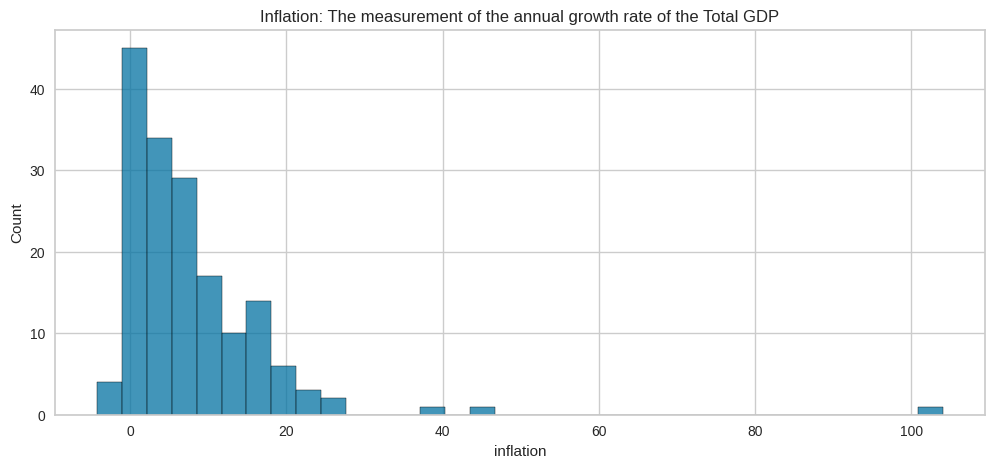

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Inflation: The measurement of the annual growth rate of the Total GDP")
ax = sns.histplot(df["inflation"])

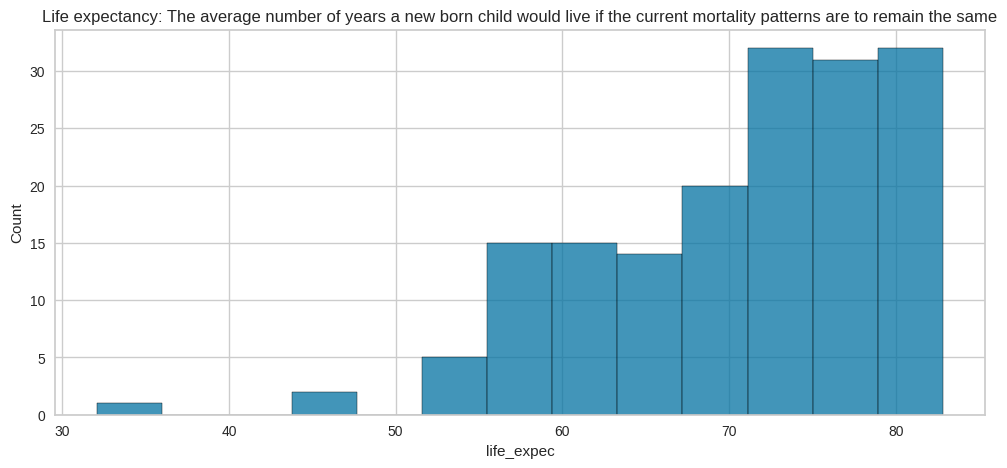

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Life expectancy: The average number of years a new born child would live if the current mortality patterns are to remain the same")
ax = sns.histplot(df["life_expec"])

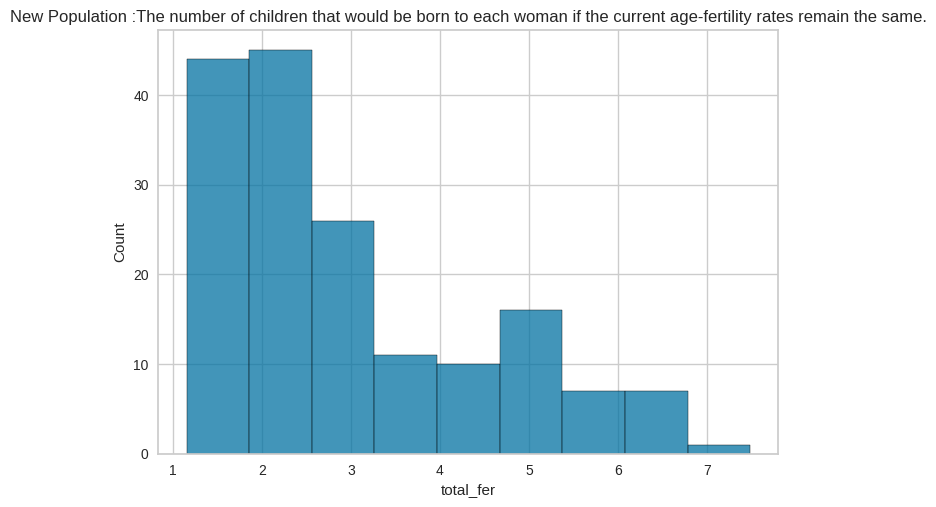

In [ ]:
# "/bgt SDEFR HYJplt.figure(figsize=(12,5))
plt.title("New Population :The number of children that would be born to each woman if the current age-fertility rates remain the same.")
ax = sns.histplot(df["total_fer"])

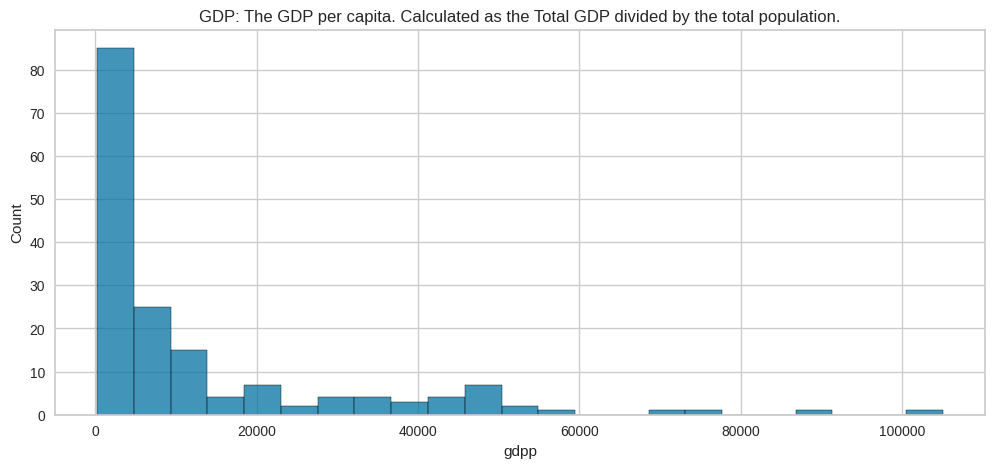

In [ ]:
plt.figure(figsize=(12,5))
plt.title("GDP: The GDP per capita. Calculated as the Total GDP divided by the total population.")
ax = sns.histplot(df["gdpp"])

<Axes: >

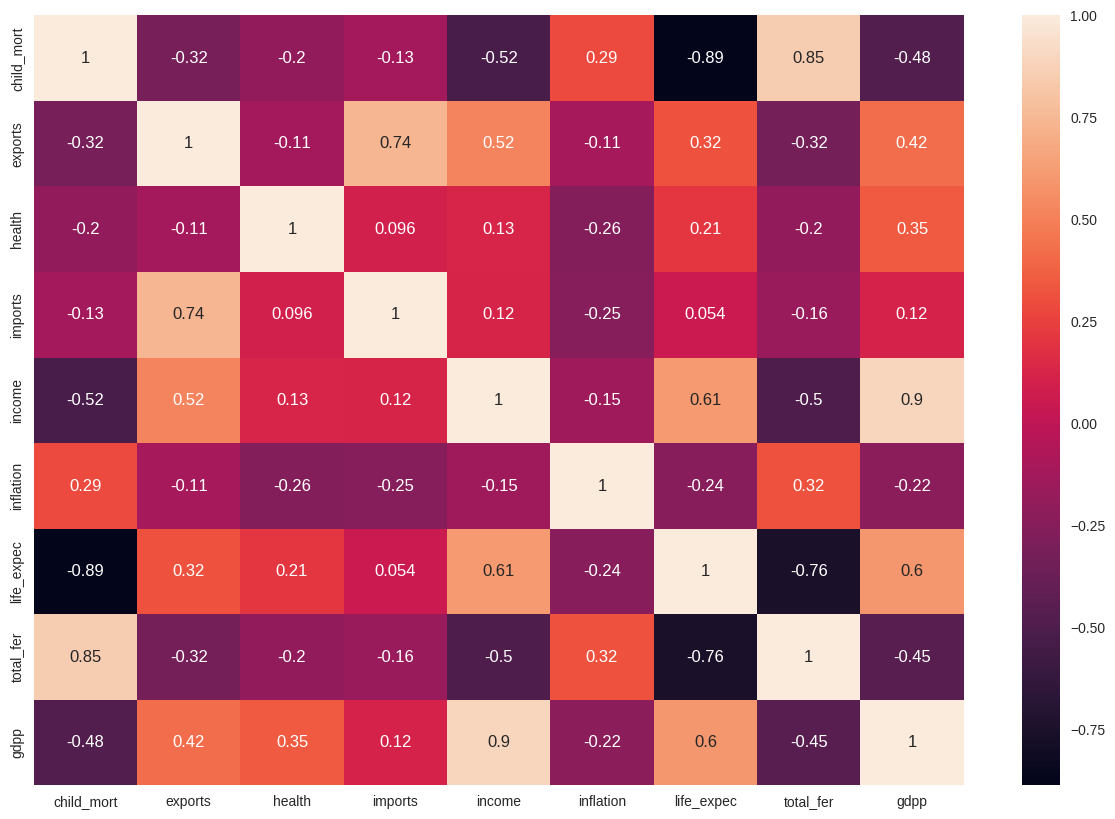

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson', min_periods=1),annot=True)

**We can see that there are a few features that might be considered for elimination due to high correlation:**

life_expect, due to high correlation with child mortality

total_fertility, due to high correlation with child mortality



# Scaling

In [ ]:
data_n=df.drop(['country'], axis =1)

In [ ]:
columns=data_n.columns
scale=SS()
rescaled_dataset = scale.fit_transform(data_n)

In [ ]:
rescaled_dataset

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [ ]:
df_standard = pd.DataFrame(data= rescaled_dataset, columns = columns)
df_standard

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_standard)
pca_data_standard = pca.transform(df_standard)

In [ ]:
pca_data_standard

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [ ]:
var=pca.explained_variance_ratio_*100
var

array([45.95173979, 17.18162565, 13.0042589 , 11.05316181,  7.34021142,
        2.48423468,  1.2604304 ,  0.98128174,  0.74305562])

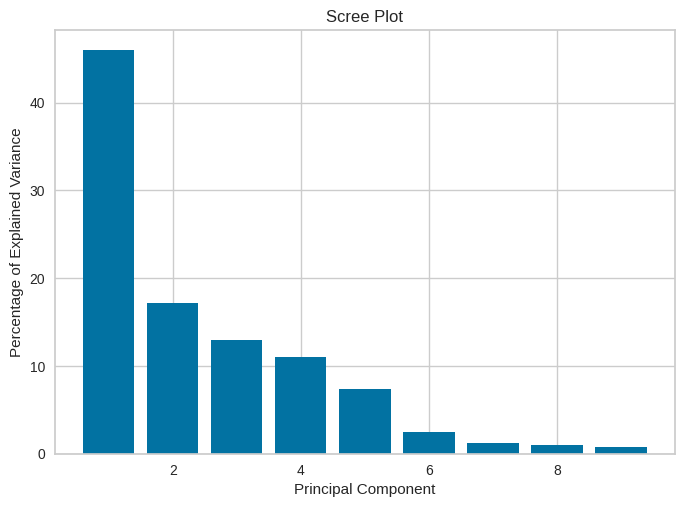

In [ ]:
plt.bar(x=range(1,10), height=var)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Text(0, 0.5, 'PC2 - 17.181625651618184%')

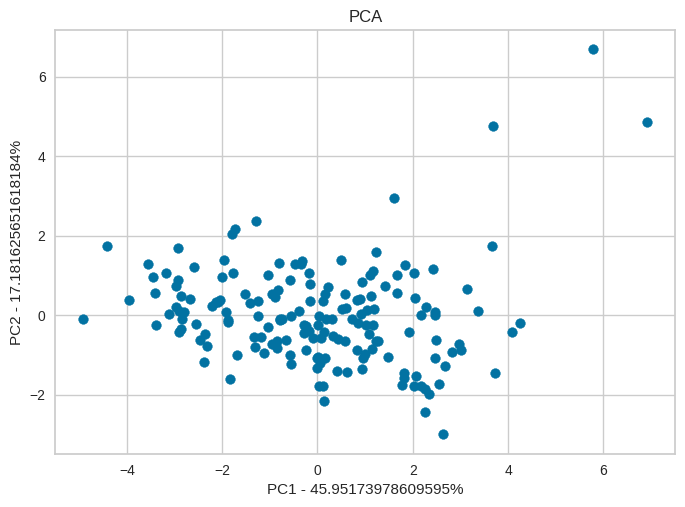

In [ ]:
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']
pca_df_standard = pd.DataFrame(pca_data_standard, columns = labels)
plt.scatter(pca_df_standard.PC1, pca_df_standard.PC2)
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(var[0]))
plt.ylabel('PC2 - {0}%'.format(var[1]))

In [ ]:
data_pca= pca_df_standard.drop(['PC6','PC7','PC8','PC9'], axis = 1)
data_pca

PC1       PC2       PC3       PC4       PC5
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475
3   -2.932423  1.695555  1.525044  0.839625 -0.273209
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007
..        ...       ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581
164  0.498524  1.390744 -0.238526 -1.074098  1.176081
165 -1.887451 -0.109453  1.109752  0.056257  0.618365
166 -2.864064  0.485998  0.223167  0.816364 -0.274068

[167 rows x 5 columns]


# K means on normal datset

To Apply K-means we first have to decide how many clusters are optimum

In [ ]:
df1=df.copy()

In [ ]:
df1

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

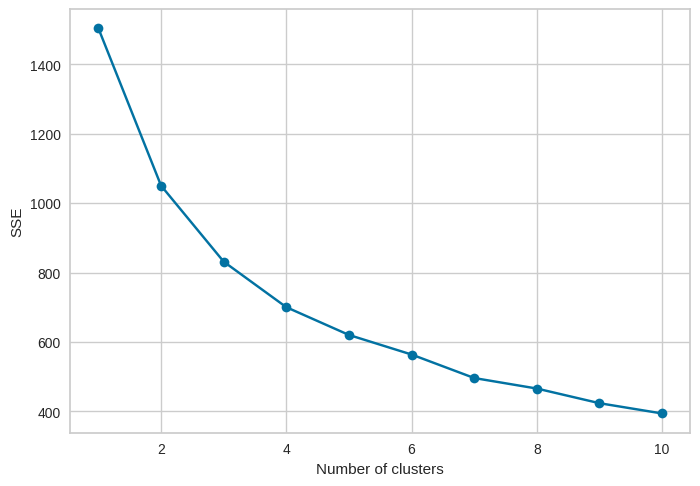

In [ ]:
sse = []
for i in range(1, 11):
    km = KMeans( n_clusters=i )
    km.fit(df_standard)
    sse.append(km.inertia_)
# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()



best n: 2
best silhouette_score: 0.28329575683463126


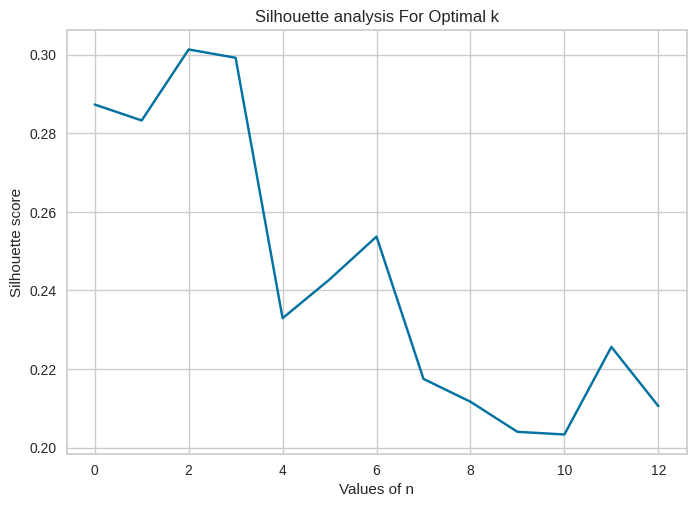

In [ ]:
from sklearn.metrics import silhouette_score
score=[]
n=range(2,15)
for i in n:
      km = KMeans(n_clusters=i)
      km = km.fit(df_standard)
      cluster_labels=km.labels_
      score.append(silhouette_score(df_standard, cluster_labels))
k=score.index(max(score))
print("best n:" ,k)
print("best silhouette_score:",score[k-1])
plt.plot(score)
plt.xlabel('Values of n')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

**We can see that the optimum number of cluster is 3**



In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_standard)

KMeans(n_clusters=3)

In [ ]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [ ]:
pd.Series(kmeans.labels_).value_counts()

2    84
1    47
0    36
dtype: int64

In [ ]:
kmeans_df = pd.DataFrame(df1)
kmeans_df['KMeans_Clusters'] = kmeans.labels_
kmeans_df.head(10)

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
5            Argentina        14.5     18.9    8.10     16.0   18700   
6              Armenia        18.1     20.8    4.40     45.3    6700   
7            Australia         4.8     19.8    8.73     20.9   41400   
8              Austria         4.3     51.3   11.00     47.8   43200   
9           Azerbaijan        39.2     54.3    5.88     20.7   16000   

   inflation  life_expec  total_fer   gdpp  KMeans_Clusters  
0      9.440        56.2       5.82    553                1  
1      4.490        76.3       1.65   4090                2  
2     16.100        76.5       2.89   4460                2  
3     22.400        60.1       6.16   3530                1  
4      1.440        76.8       2.13  12200                2  
5     20.900        75.8       2.37  10300                2  
6      7.770        73.3       1.69   3220                2  
7      1.160        82.0       1.93  51900                0  
8      0.873        80.5       1.44  46900                0  
9     13.800        69.1       1.92   5840                2

In [ ]:
features=list(data_n.columns)
features

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [ ]:
kmeans_df_n=kmeans_df.drop(['country'], axis =1)
kmeans_df_n

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  KMeans_Clusters  
0         5.82    553                1  
1         1.65   4090                2  
2         2.89   4460                2  
3         6.16   3530                1  
4         2.13  12200                2  
..         ...    ...              ...  
162       3.50   2970                2  
163       2.47  13500                2  
164       1.95   1310                2  
165       4.67   1310                1  
166       5.40   1460                1  

[167 rows x 10 columns]

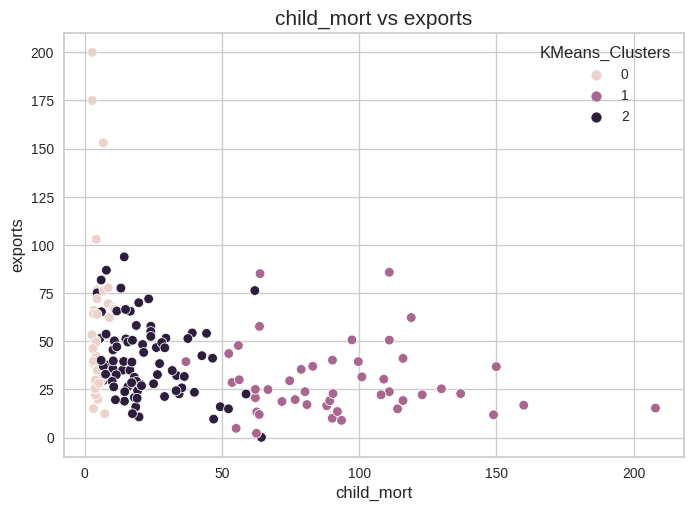

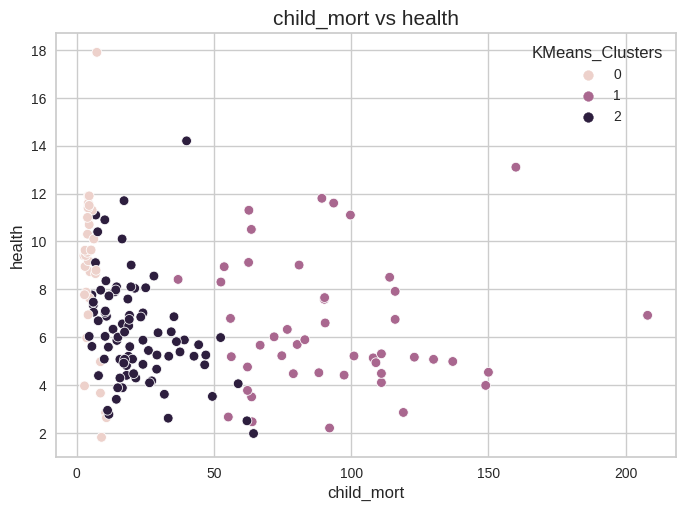

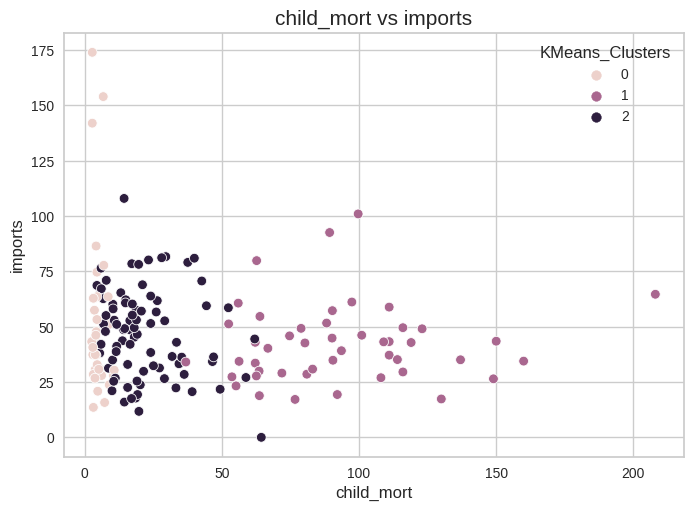

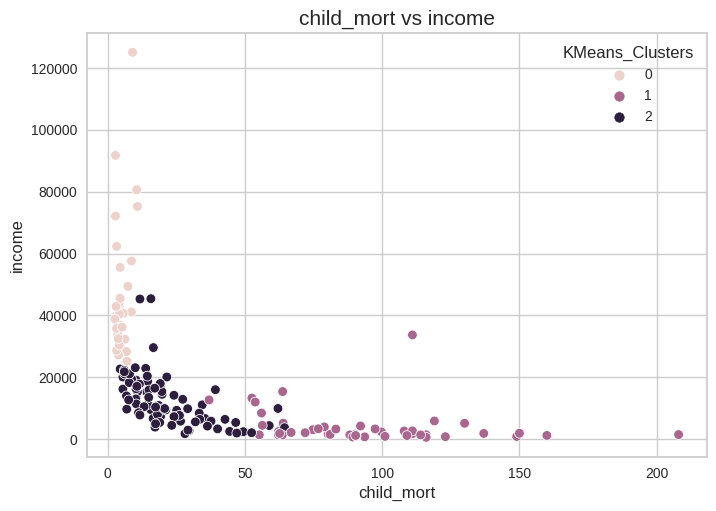

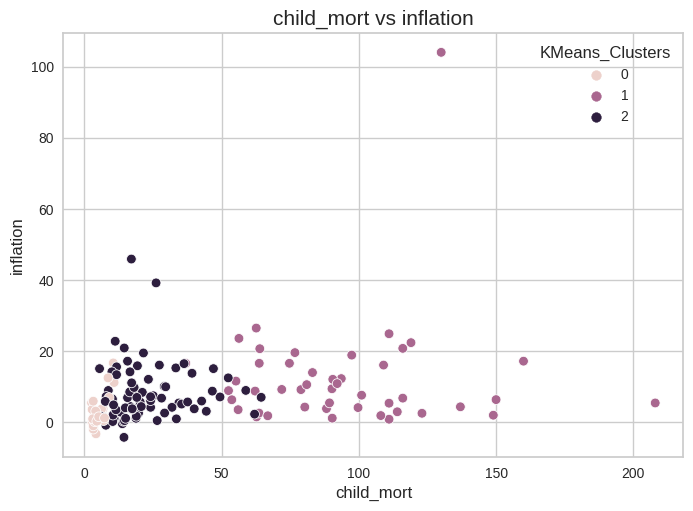

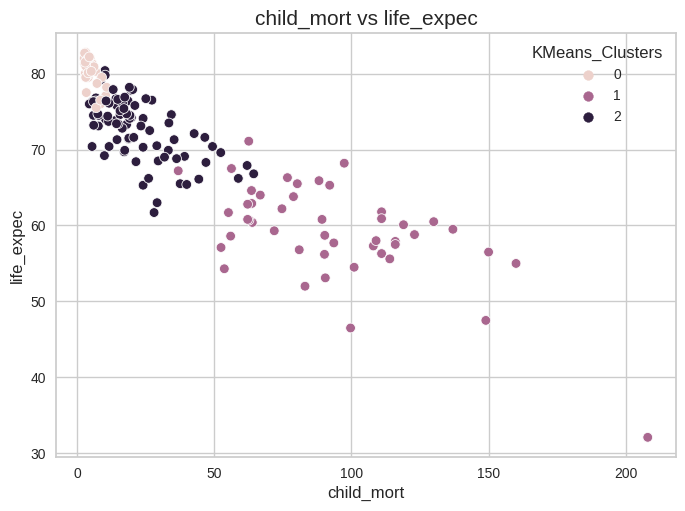

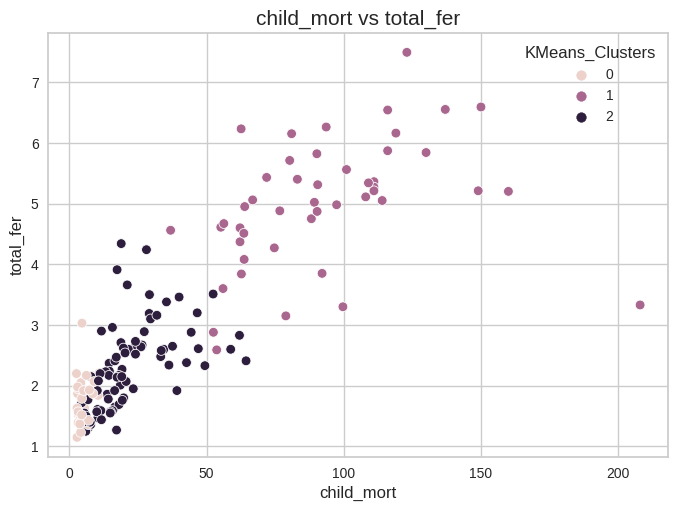

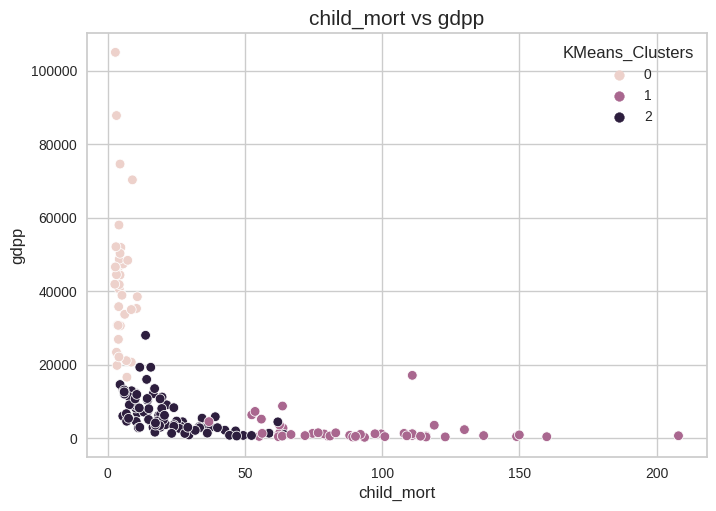

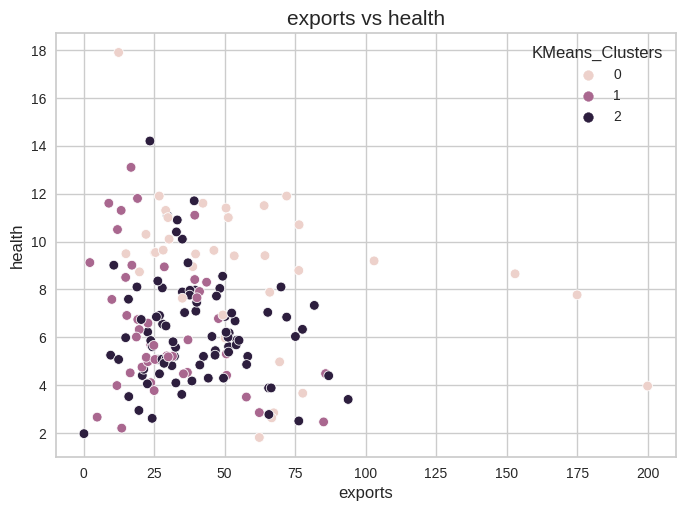

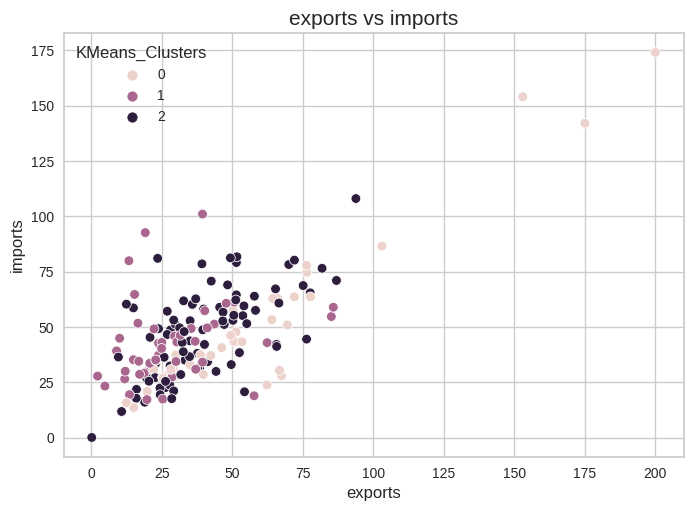

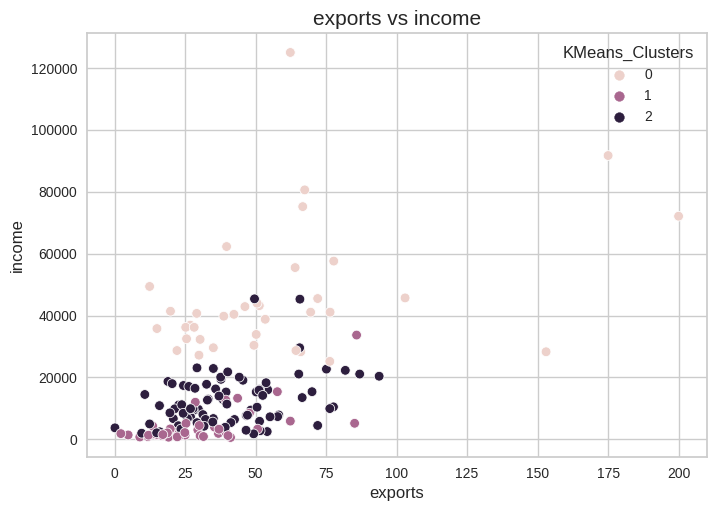

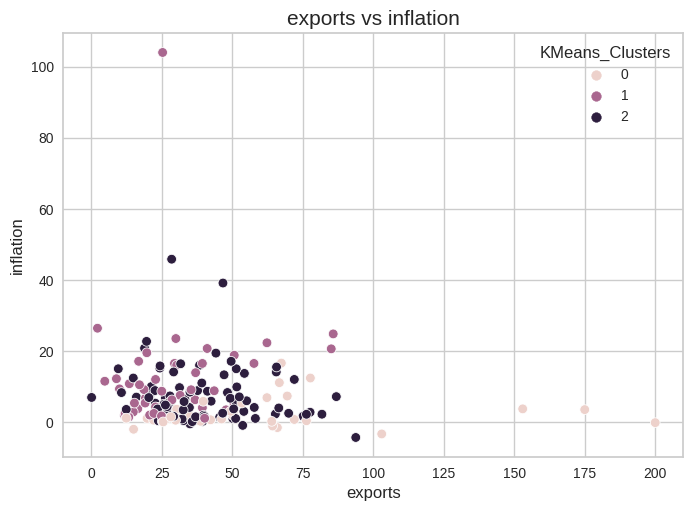

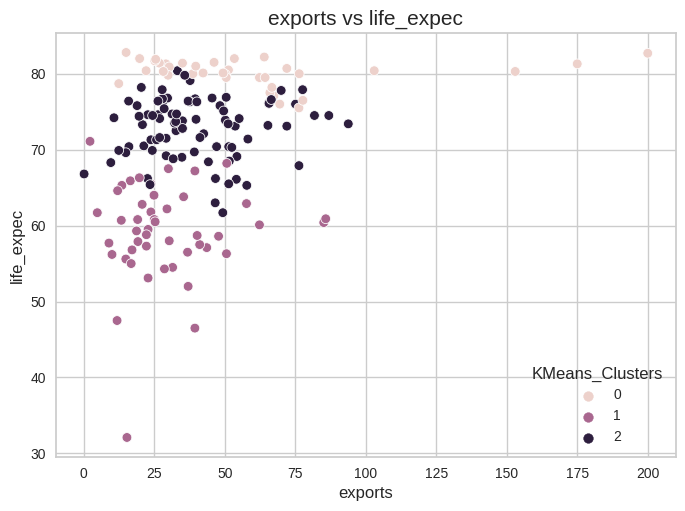

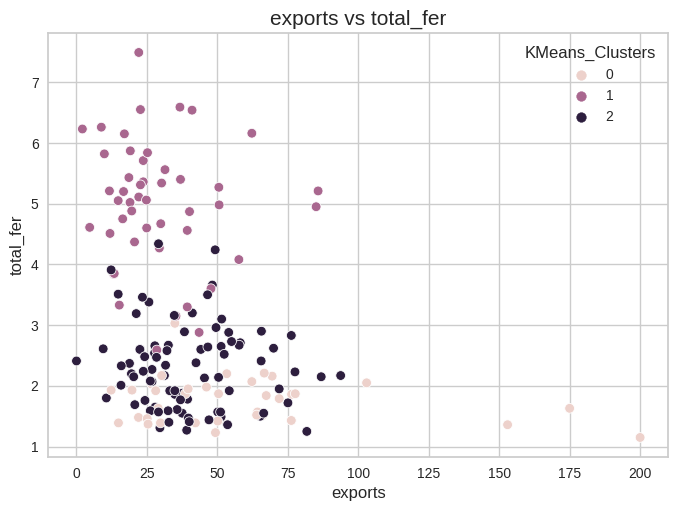

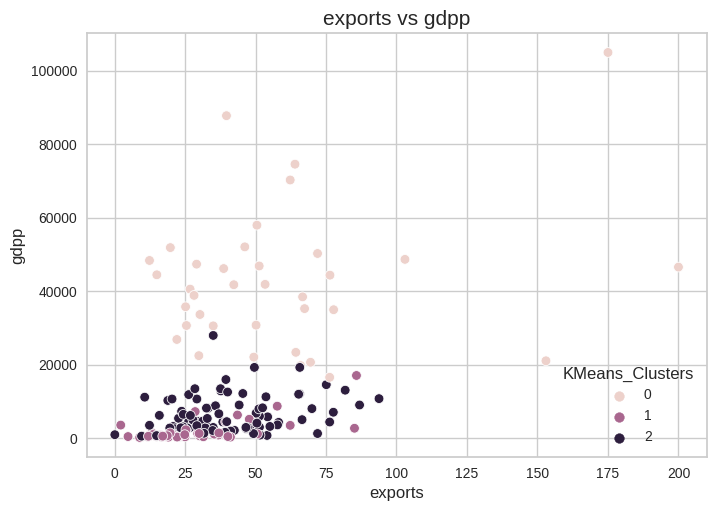

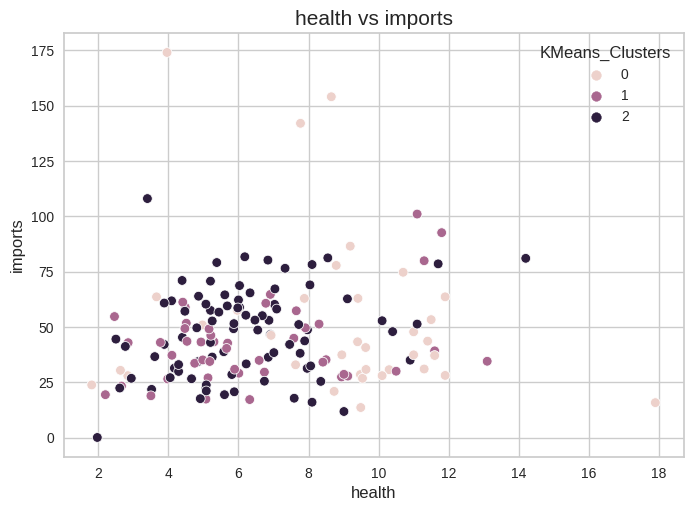

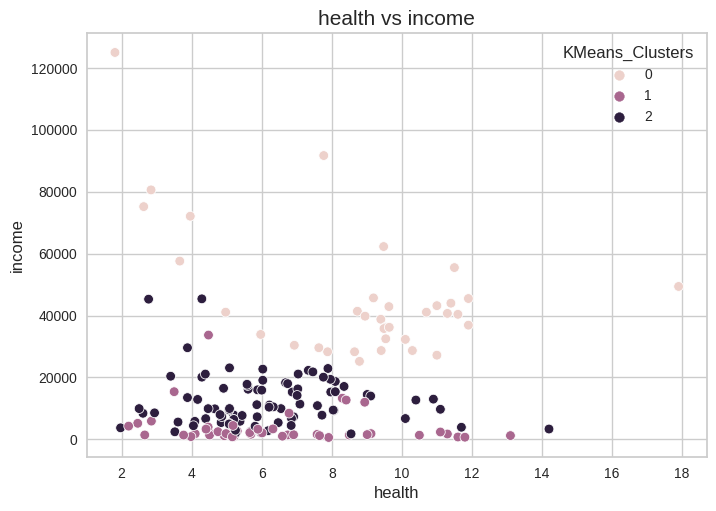

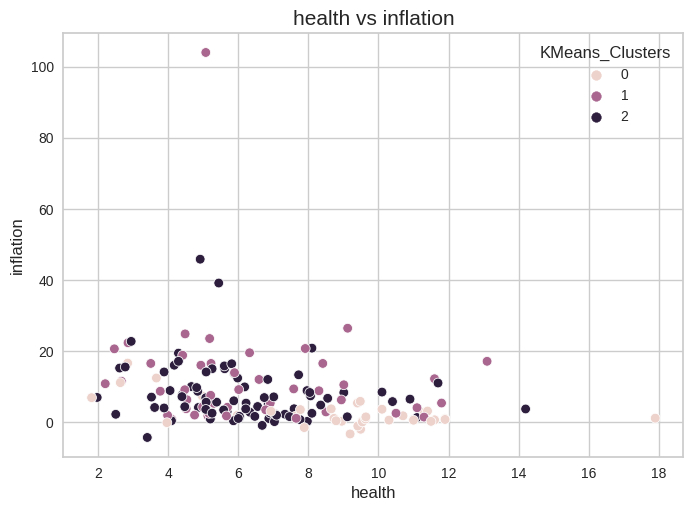

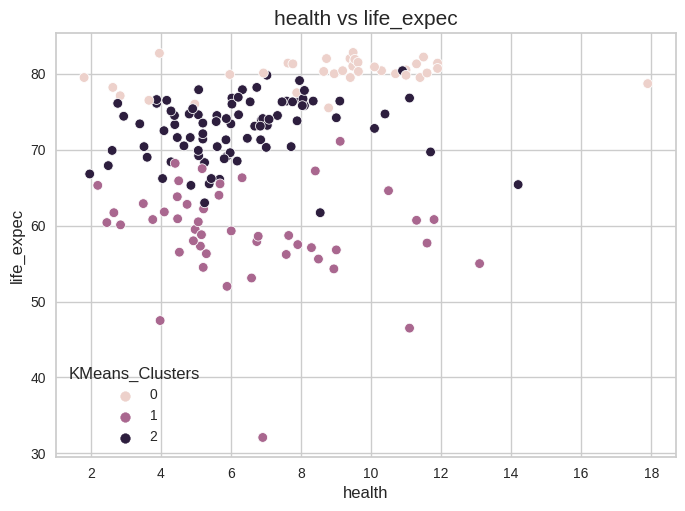

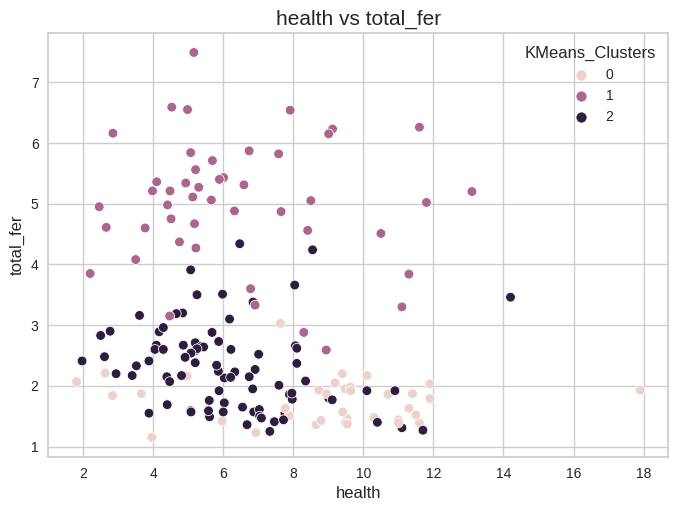

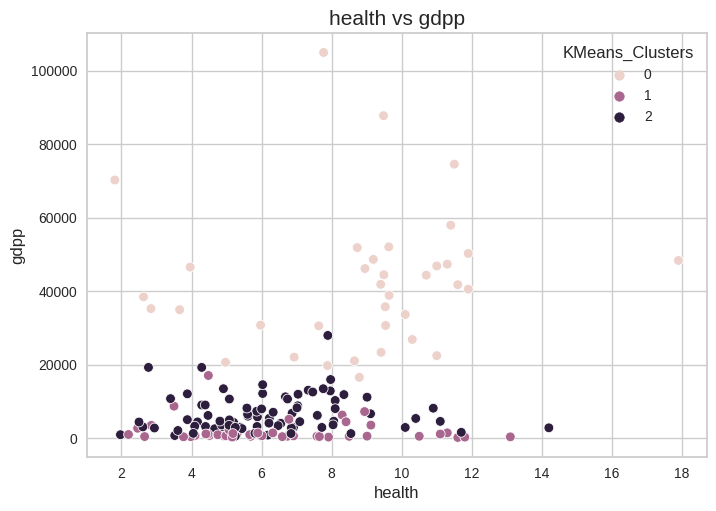

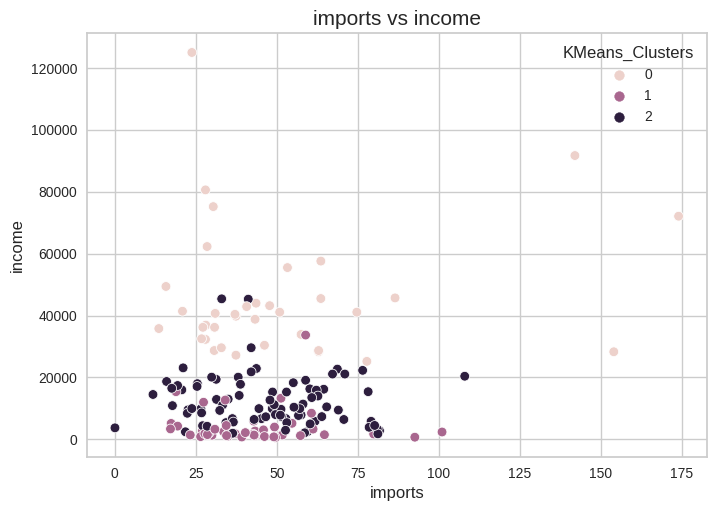

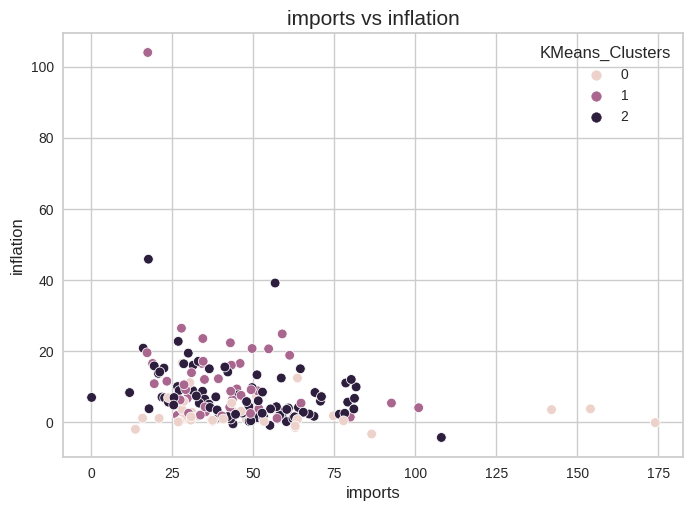

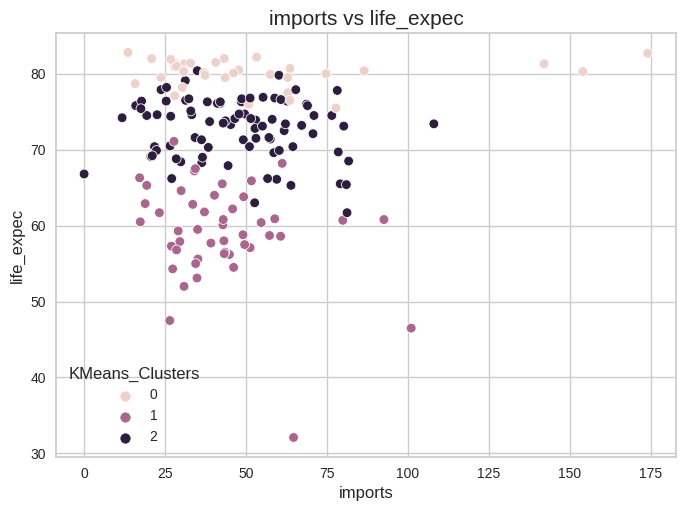

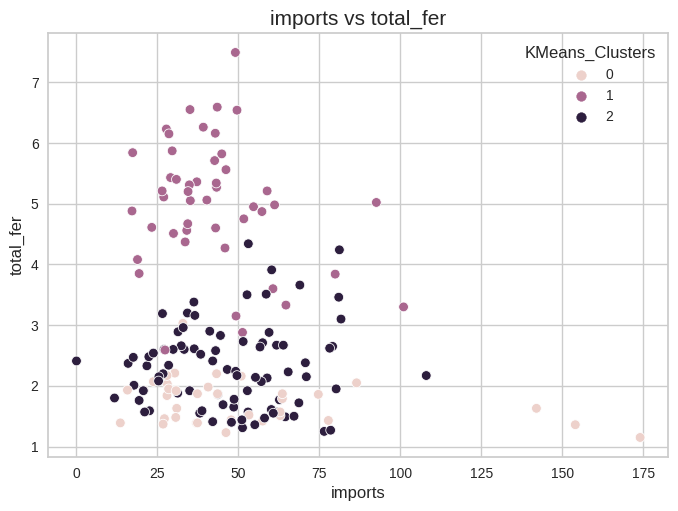

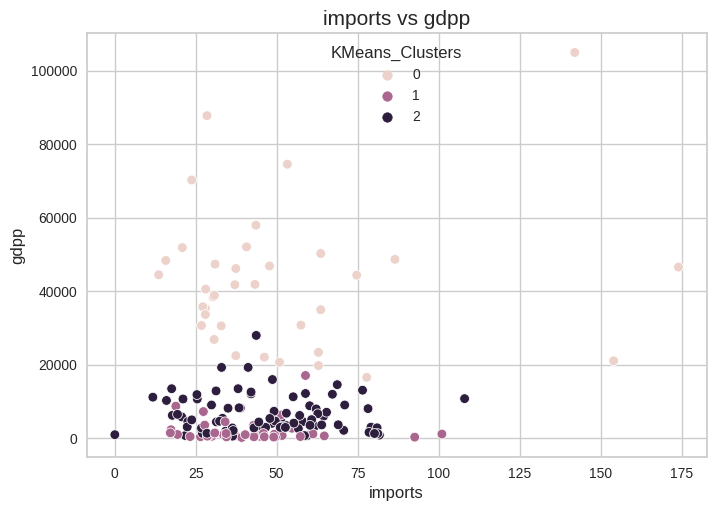

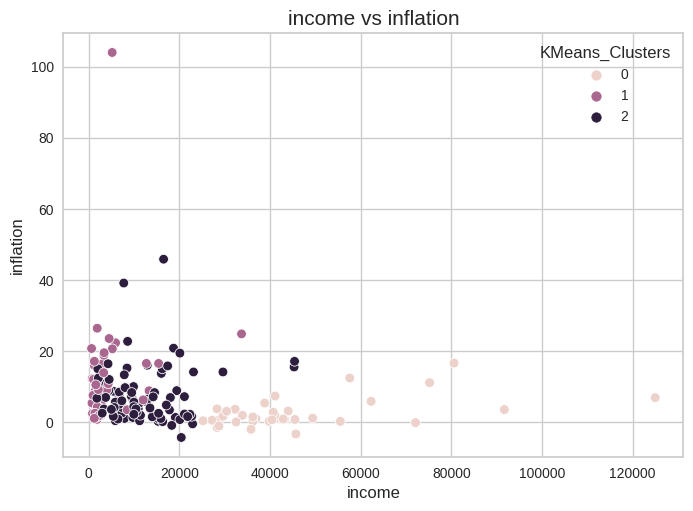

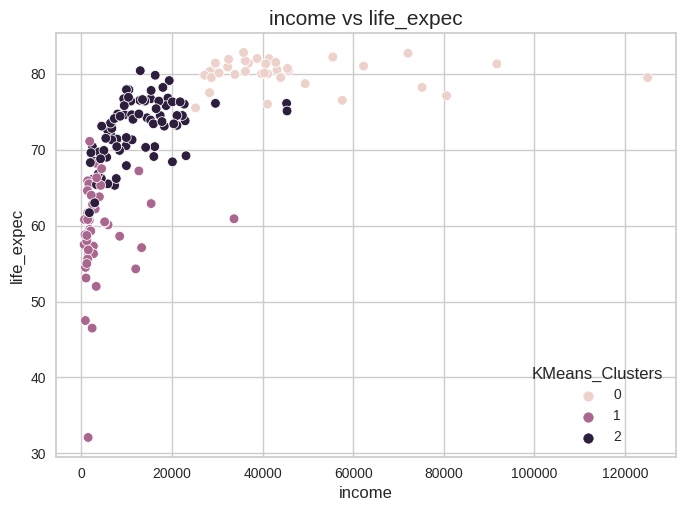

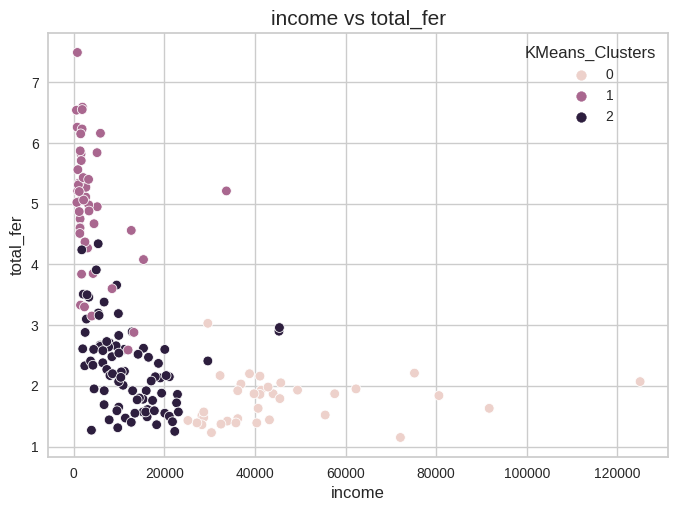

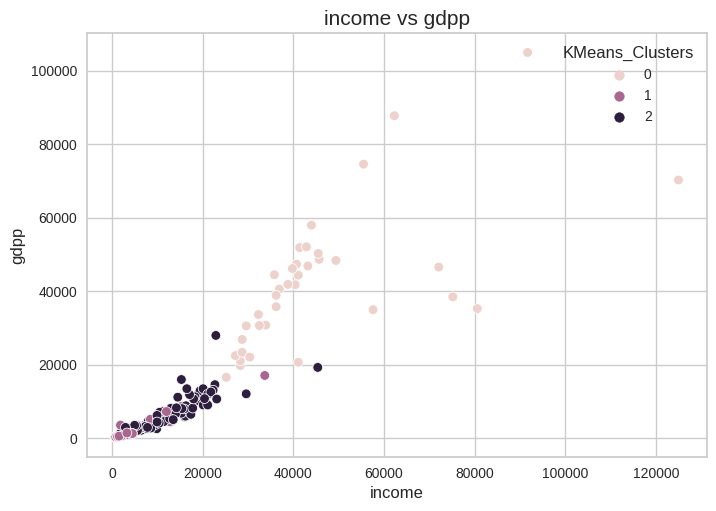

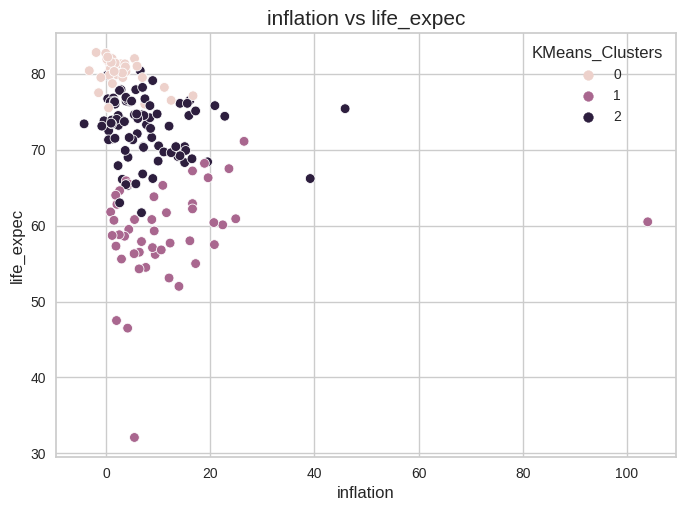

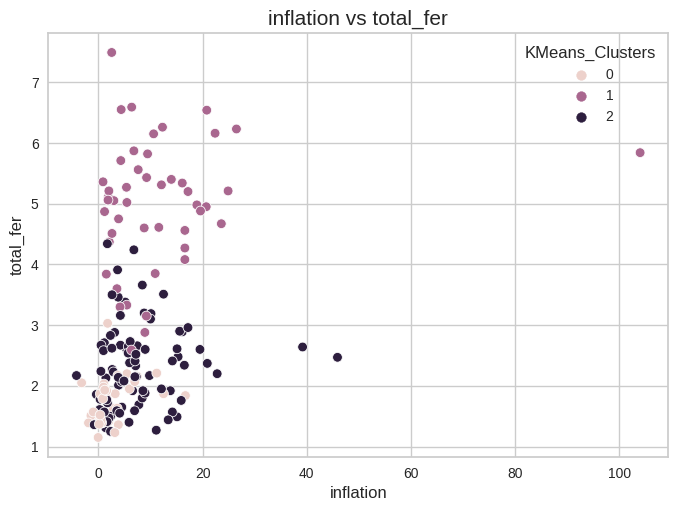

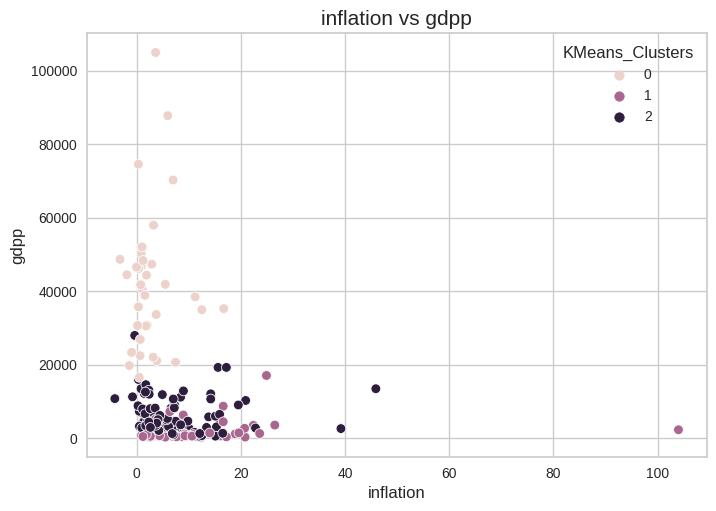

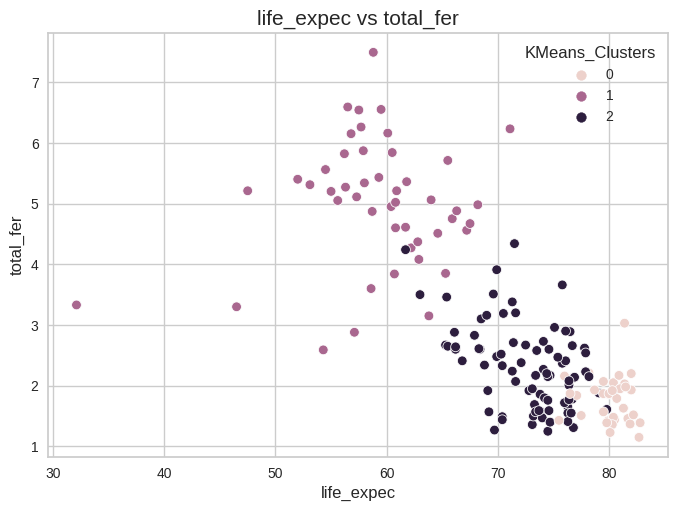

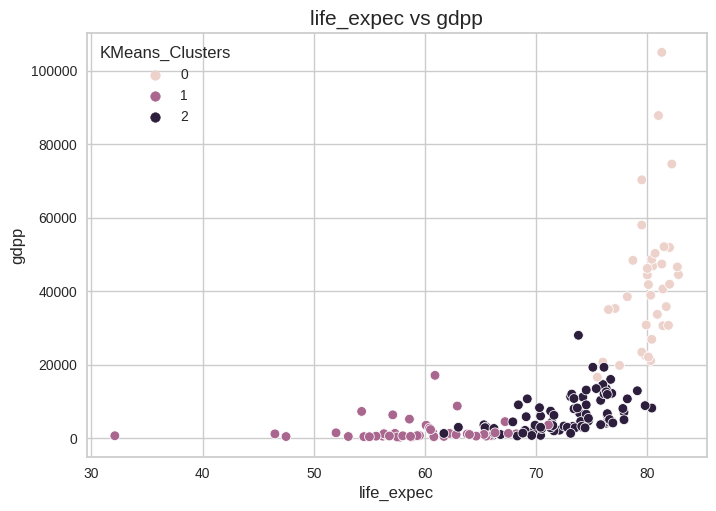

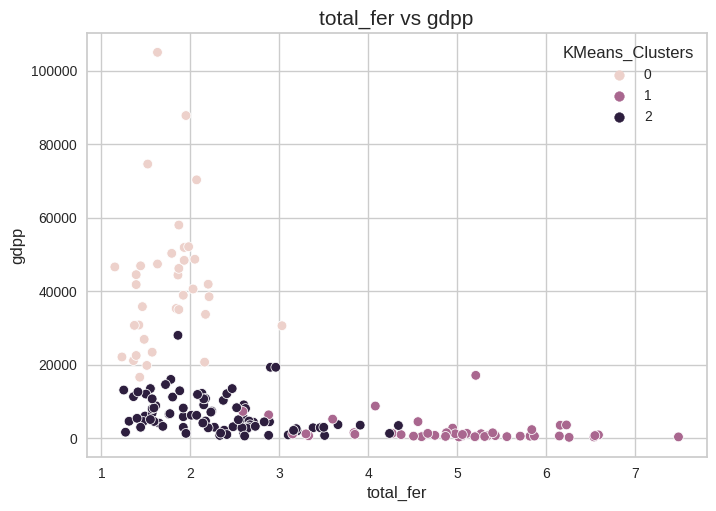

In [ ]:
for i in range(9):
  for  j in range(i+1,9):
    labels = kmeans.labels_
    sns.scatterplot(x=kmeans_df_n.iloc[:, i], y=kmeans_df_n.iloc[:, j], hue='KMeans_Clusters', data=kmeans_df_n)
    plt.title(kmeans_df_n.columns[i]+" vs "+kmeans_df_n.columns[j], fontsize=15)
    plt.xlabel(kmeans_df_n.columns[i], fontsize=12)
    plt.ylabel(kmeans_df_n.columns[j], fontsize=12)
    plt.show()


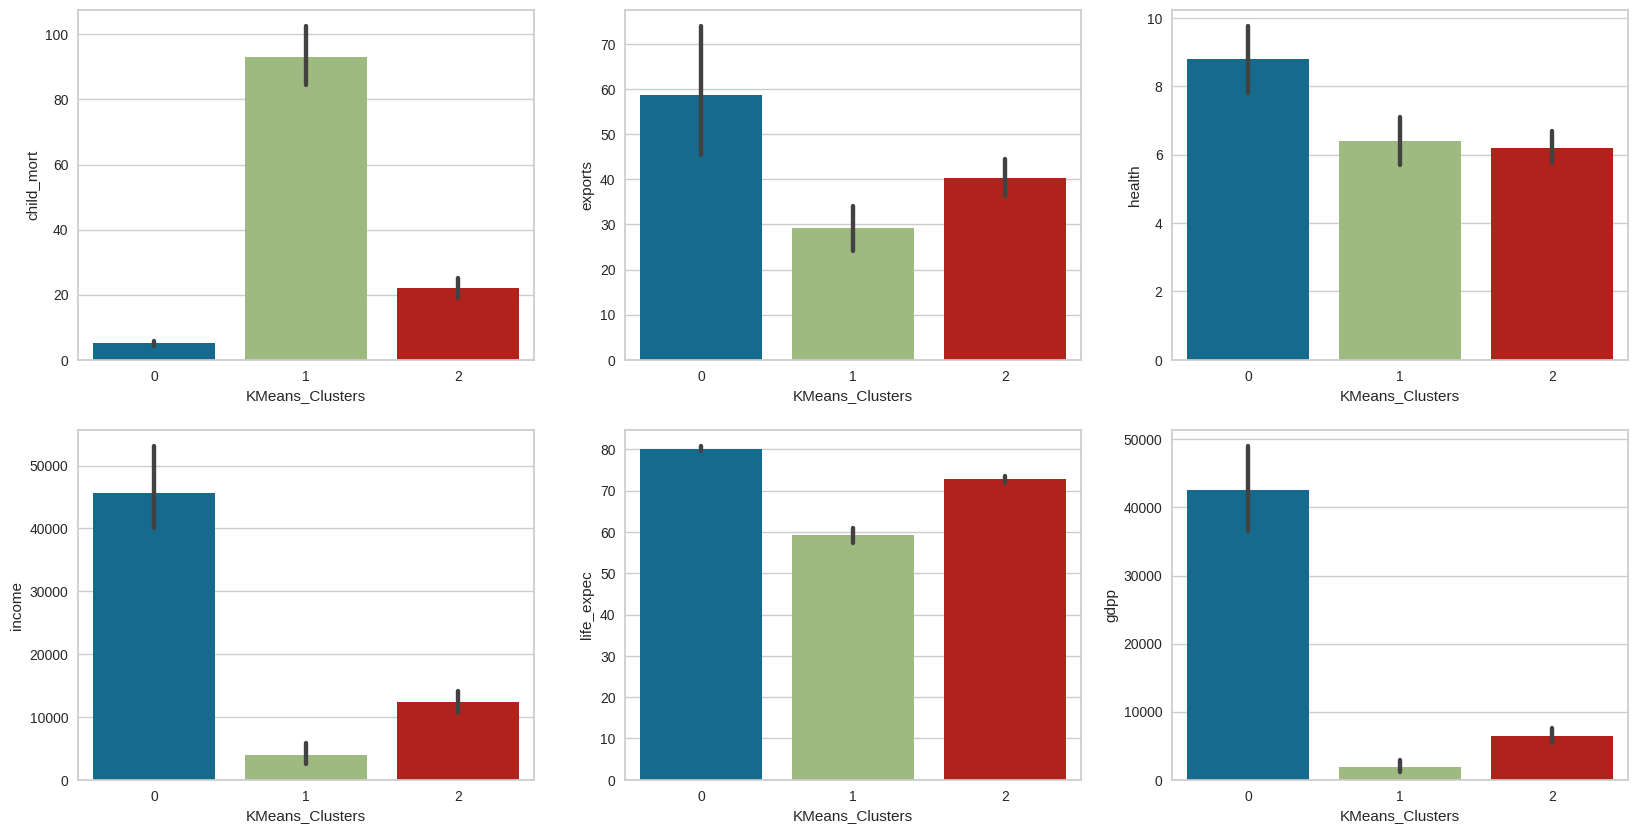

In [ ]:
fig,ax = plt.subplots(2,3, figsize=(20,10),squeeze=False)
sns.barplot(x='KMeans_Clusters', y=kmeans_df_n.columns[0],data=kmeans_df_n,ax=ax[0,0])
sns.barplot(x='KMeans_Clusters', y=kmeans_df_n.columns[1],data=kmeans_df_n,ax=ax[0,1])
sns.barplot(x='KMeans_Clusters', y=kmeans_df_n.columns[2],data=kmeans_df_n,ax=ax[0,2])
sns.barplot(x='KMeans_Clusters', y=kmeans_df_n.columns[4],data=kmeans_df_n,ax=ax[1,0])
sns.barplot(x='KMeans_Clusters', y=kmeans_df_n.columns[6],data=kmeans_df_n,ax=ax[1,1])
sns.barplot(x='KMeans_Clusters', y=kmeans_df_n.columns[8],data=kmeans_df_n,ax=ax[1,2])

plt.show()

In [ ]:
under_developing=kmeans_df[kmeans_df['KMeans_Clusters']==1]['country']
developing=kmeans_df[kmeans_df['KMeans_Clusters']==2]['country']
developed=kmeans_df[kmeans_df['KMeans_Clusters']==0]['country']

In [ ]:
kmeans_df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  KMeans_Clusters  
0         9.44        56.2       5.82    553                1  
1         4.49        76.3       1.65   4090                2  
2        16.10        76.5       2.89   4460                2  
3        22.40        60.1       6.16   3530                1  
4         1.44        76.8       2.13  12200                2  
..         ...         ...        ...    ...              ...  
162       2.62        63.0       3.50   2970                2  
163      45.90        75.4       2.47  13500                2  
164      12.10        73.1       1.95   1310                2  
165      23.60        67.5       4.67   1310                1  
166      14.00        52.0       5.40   1460                1  

[167 rows x 11 columns]

**Under developed country according to k-means**

In [ ]:
under_developing

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

**Developing country according to k-means**

In [ ]:
print(developing)

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: country, Length: 84, dtype: object


**Developed country according to k-means**

In [ ]:
developed

7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United

In [ ]:
kmeans_df_copy=kmeans_df.copy()

In [ ]:
kmeans_df_copy

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  KMeans_Clusters  
0         9.44        56.2       5.82    553                1  
1         4.49        76.3       1.65   4090                2  
2        16.10        76.5       2.89   4460                2  
3        22.40        60.1       6.16   3530                1  
4         1.44        76.8       2.13  12200                2  
..         ...         ...        ...    ...              ...  
162       2.62        63.0       3.50   2970                2  
163      45.90        75.4       2.47  13500                2  
164      12.10        73.1       1.95   1310                2  
165      23.60        67.5       4.67   1310                1  
166      14.00        52.0       5.40   1460                1  

[167 rows x 11 columns]

In [ ]:
kmeans_df_copy['KMeans_Clusters'].loc[kmeans_df_copy['KMeans_Clusters'] == 1] = 'Help Needed'
kmeans_df_copy['KMeans_Clusters'].loc[kmeans_df_copy['KMeans_Clusters'] == 2] = 'Might need help'
kmeans_df_copy['KMeans_Clusters'].loc[kmeans_df_copy['KMeans_Clusters'] == 0] = 'No need'
fig = px.choropleth(kmeans_df_copy[['country','KMeans_Clusters']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = kmeans_df_copy['KMeans_Clusters'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

# Kmeans on PCA dataset

In [ ]:
df_=df.copy()

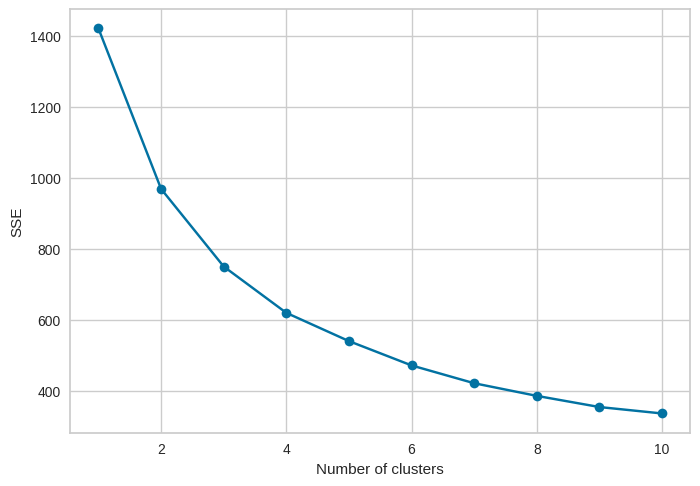

In [ ]:
sse = []
for i in range(1, 11):
    km = KMeans( n_clusters=i )
    km.fit(data_pca)
    sse.append(km.inertia_)
# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

best n: 2
best silhouette_score: 0.30797697865190143


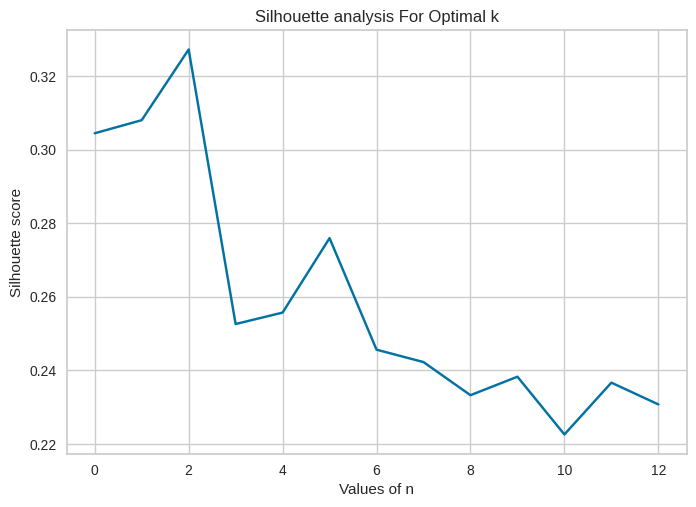

In [ ]:
score=[]
n=range(2,15)
for i in n:
      km = KMeans(n_clusters=i)
      km = km.fit(data_pca)
      cluster_labels=km.labels_
      score.append(silhouette_score(data_pca, cluster_labels))
k=score.index(max(score))
print("best n:" ,k)
print("best silhouette_score:",score[k-1])
plt.plot(score)
plt.xlabel('Values of n')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_pca)
df_['cluster'] = kmeans.labels_
df_

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  cluster  
0         9.44        56.2       5.82    553        0  
1         4.49        76.3       1.65   4090        1  
2        16.10        76.5       2.89   4460        1  
3        22.40        60.1       6.16   3530        0  
4         1.44        76.8       2.13  12200        1  
..         ...         ...        ...    ...      ...  
162       2.62        63.0       3.50   2970        1  
163      45.90        75.4       2.47  13500        1  
164      12.10        73.1       1.95   1310        1  
165      23.60        67.5       4.67   1310        0  
166      14.00        52.0       5.40   1460        0  

[167 rows x 11 columns]

In [ ]:
df_n=df_.drop(['country'], axis =1)

Cluster 1

In [ ]:
df_[df_['cluster'] == 0]

country  child_mort  exports  health  imports  income  \
0                 Afghanistan        90.2    10.00    7.58     44.9    1610   
3                      Angola       119.0    62.30    2.85     42.9    5900   
17                      Benin       111.0    23.80    4.10     37.2    1820   
21                   Botswana        52.5    43.60    8.30     51.3   13300   
25               Burkina Faso       116.0    19.20    6.74     29.6    1430   
26                    Burundi        93.6     8.92   11.60     39.2     764   
28                   Cameroon       108.0    22.20    5.13     27.0    2660   
31   Central African Republic       149.0    11.80    3.98     26.5     888   
32                       Chad       150.0    36.80    4.53     43.5    1930   
36                    Comoros        88.2    16.50    4.51     51.7    1410   
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
38                Congo, Rep.        63.9    85.10    2.46     54.7    5190   
40              Cote d'Ivoire       111.0    50.60    5.30     43.3    2690   
49          Equatorial Guinea       111.0    85.80    4.48     58.9   33700   
50                    Eritrea        55.2     4.79    2.66     23.3    1420   
55                      Gabon        63.7    57.70    3.50     18.9   15400   
56                     Gambia        80.3    23.80    5.69     42.7    1660   
59                      Ghana        74.7    29.50    5.22     45.9    3060   
63                     Guinea       109.0    30.30    4.93     43.2    1190   
64              Guinea-Bissau       114.0    14.90    8.50     35.2    1390   
66                      Haiti       208.0    15.30    6.91     64.7    1500   
72                       Iraq        36.9    39.40    8.41     34.1   12700   
80                      Kenya        62.2    20.70    4.75     33.6    2480   
81                   Kiribati        62.7    13.30   11.30     79.9    1730   
84                        Lao        78.9    35.40    4.47     49.3    3980   
87                    Lesotho        99.7    39.40   11.10    101.0    2380   
88                    Liberia        89.3    19.10   11.80     92.6     700   
93                 Madagascar        62.2    25.00    3.77     43.0    1390   
94                     Malawi        90.5    22.80    6.59     34.9    1030   
97                       Mali       137.0    22.80    4.98     35.1    1870   
99                 Mauritania        97.4    50.70    4.41     61.2    3320   
106                Mozambique       101.0    31.50    5.21     46.2     918   
108                   Namibia        56.0    47.80    6.78     60.7    8460   
112                     Niger       123.0    22.20    5.16     49.1     814   
113                   Nigeria       130.0    25.30    5.07     17.4    5150   
116                  Pakistan        92.1    13.50    2.20     19.4    4280   
126                    Rwanda        63.6    12.00   10.50     30.0    1350   
129                   Senegal        66.8    24.90    5.66     40.3    2180   
132              Sierra Leone       160.0    16.80   13.10     34.5    1220   
137              South Africa        53.7    28.60    8.94     27.4   12000   
142                     Sudan        76.7    19.70    6.32     17.2    3370   
147                  Tanzania        71.9    18.70    6.01     29.1    2090   
149               Timor-Leste        62.6     2.20    9.12     27.8    1850   
150                      Togo        90.3    40.20    7.65     57.3    1210   
155                    Uganda        81.0    17.10    9.01     28.6    1540   
165                     Yemen        56.3    30.00    5.18     34.4    4480   
166                    Zambia        83.1    37.00    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  cluster  
0        9.440        56.2       5.82    553        0  
3       22.400        60.1       6.16   3530        0  
17       0.885        61.8       5.36    758        0  
21   

cluster 2

In [ ]:
df_[df_['cluster'] == 1]

country  child_mort  exports  health  imports  income  \
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
5              Argentina        14.5     18.9    8.10     16.0   18700   
6                Armenia        18.1     20.8    4.40     45.3    6700   
..                   ...         ...      ...     ...      ...     ...   
160              Uruguay        10.6     26.3    8.35     25.4   17100   
161           Uzbekistan        36.3     31.7    5.81     28.5    4240   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   

     inflation  life_expec  total_fer   gdpp  cluster  
1         4.49        76.3       1.65   4090        1  
2        16.10        76.5       2.89   4460        1  
4         1.44        76.8       2.13  12200        1  
5        20.90        75.8       2.37  10300        1  
6         7.77        73.3       1.69   3220        1  
..         ...         ...        ...    ...      ...  
160       4.91        76.4       2.08  11900        1  
161      16.50        68.8       2.34   1380        1  
162       2.62        63.0       3.50   2970        1  
163      45.90        75.4       2.47  13500        1  
164      12.10        73.1       1.95   1310        1  

[84 rows x 11 columns]

Cluster 3

In [ ]:
df_[df_['cluster'] == 2]

country  child_mort  exports  health  imports  income  \
7               Australia         4.8     19.8    8.73     20.9   41400   
8                 Austria         4.3     51.3   11.00     47.8   43200   
11                Bahrain         8.6     69.5    4.97     50.9   41100   
15                Belgium         4.5     76.4   10.70     74.7   41100   
23                 Brunei        10.5     67.4    2.84     28.0   80600   
29                 Canada         5.6     29.1   11.30     31.0   40700   
42                 Cyprus         3.6     50.2    5.97     57.5   33900   
43         Czech Republic         3.4     66.0    7.88     62.9   28300   
44                Denmark         4.1     50.5   11.40     43.6   44000   
53                Finland         3.0     38.7    8.95     37.4   39800   
54                 France         4.2     26.8   11.90     28.1   36900   
58                Germany         4.2     42.3   11.60     37.1   40400   
60                 Greece         3.9     22.1   10.30     30.7   28700   
68                Iceland         2.6     53.4    9.40     43.3   38800   
73                Ireland         4.2    103.0    9.19     86.5   45700   
74                 Israel         4.6     35.0    7.63     32.9   29600   
75                  Italy         4.0     25.2    9.53     27.2   36200   
77                  Japan         3.2     15.0    9.49     13.6   35800   
82                 Kuwait        10.8     66.7    2.63     30.4   75200   
91             Luxembourg         2.8    175.0    7.77    142.0   91700   
98                  Malta         6.8    153.0    8.65    154.0   28300   
110           Netherlands         4.5     72.0   11.90     63.6   45500   
111           New Zealand         6.2     30.3   10.10     28.0   32300   
114                Norway         3.2     39.7    9.48     28.5   62300   
122              Portugal         3.9     29.9   11.00     37.4   27200   
123                 Qatar         9.0     62.3    1.81     23.8  125000   
133             Singapore         2.8    200.0    3.96    174.0   72100   
134       Slovak Republic         7.0     76.3    8.79     77.8   25200   
135              Slovenia         3.2     64.3    9.41     62.9   28700   
138           South Korea         4.1     49.4    6.93     46.2   30400   
139                 Spain         3.8     25.5    9.54     26.8   32500   
144                Sweden         3.0     46.2    9.63     40.7   42900   
145           Switzerland         4.5     64.0   11.50     53.3   55500   
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   
158        United Kingdom         5.2     28.2    9.64     30.8   36200   
159         United States         7.3     12.4   17.90     15.8   49400   

     inflation  life_expec  total_fer    gdpp  cluster  
7        1.160        82.0       1.93   51900        2  
8        0.873        80.5       1.44   46900        2  
11       7.440        76.0       2.16   20700        2  
15       1.880        80.0       1.86   44400        2  
23      16.700        77.1       1.84   35300        2  
29       2.870        81.3       1.63   47400        2  
42       2.010        79.9       1.42   30800        2  
43      -1.430        77.5       1.51   19800        2  
44       3.220        79.5       1.87   58000        2  
53       0.351        80.0       1.87   46200        2  
54       1.050        81.4       2.03   40600        2  
58       0.758        80.1       1.39   41800        2  
60       0.673        80.4       1.48   26900        2  
68       5.470        82.0       2.20   41900        2  
73      -3.220        80.4       2.05   48700        2  
74       1.770        81.4       3.03   30600        2  
75       0.319        81.7       1.46   35800        2  
77      -1.900        82.8       1.39   44500        2  
82      11.200        78.2       2.21   38500        2  
91       3.620        81.3       1.63  105000        2  
98       3.830        80.3       1.36   21100

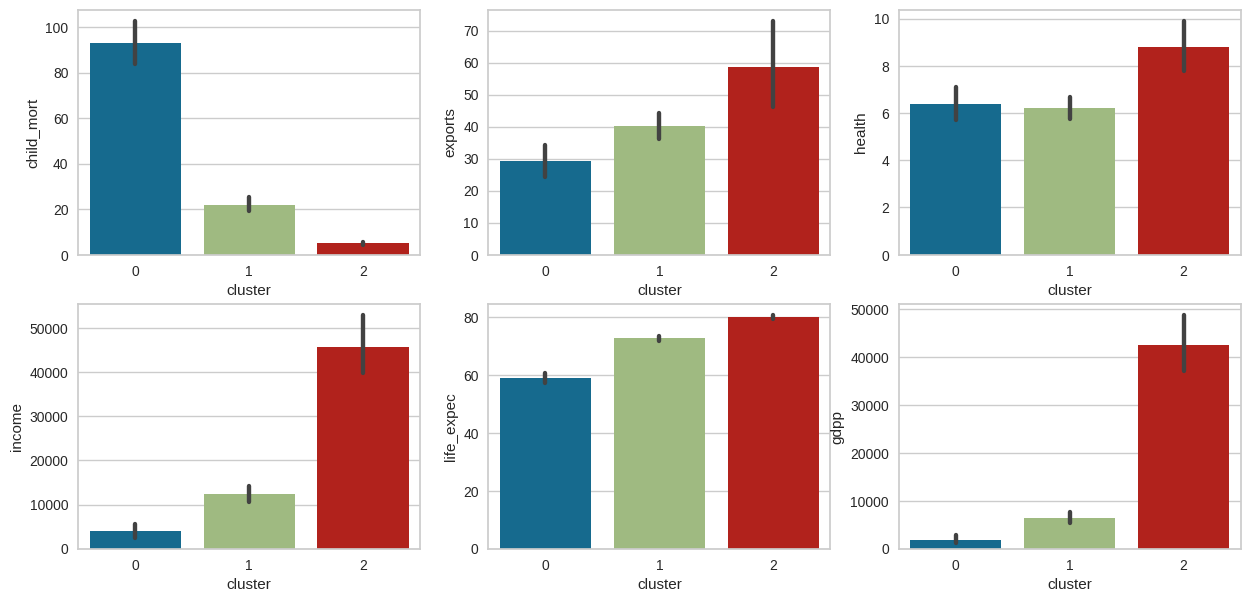

In [ ]:
fig,ax = plt.subplots(2,3, figsize=(15,7),squeeze=False)
sns.barplot(x='cluster', y=df_n.columns[0],data=df_n,ax=ax[0,0])
sns.barplot(x='cluster', y=df_n.columns[1],data=df_n,ax=ax[0,1])
sns.barplot(x='cluster', y=df_n.columns[2],data=df_n,ax=ax[0,2])
sns.barplot(x='cluster', y=df_n.columns[4],data=df_n,ax=ax[1,0])
sns.barplot(x='cluster', y=df_n.columns[6],data=df_n,ax=ax[1,1])
sns.barplot(x='cluster', y=df_n.columns[8],data=df_n,ax=ax[1,2])

plt.show()

The above barplot shows that Cluster that has been clsasified as 0 is the most under developed

#Hierarchical clustering

In [ ]:
df2=df.copy()

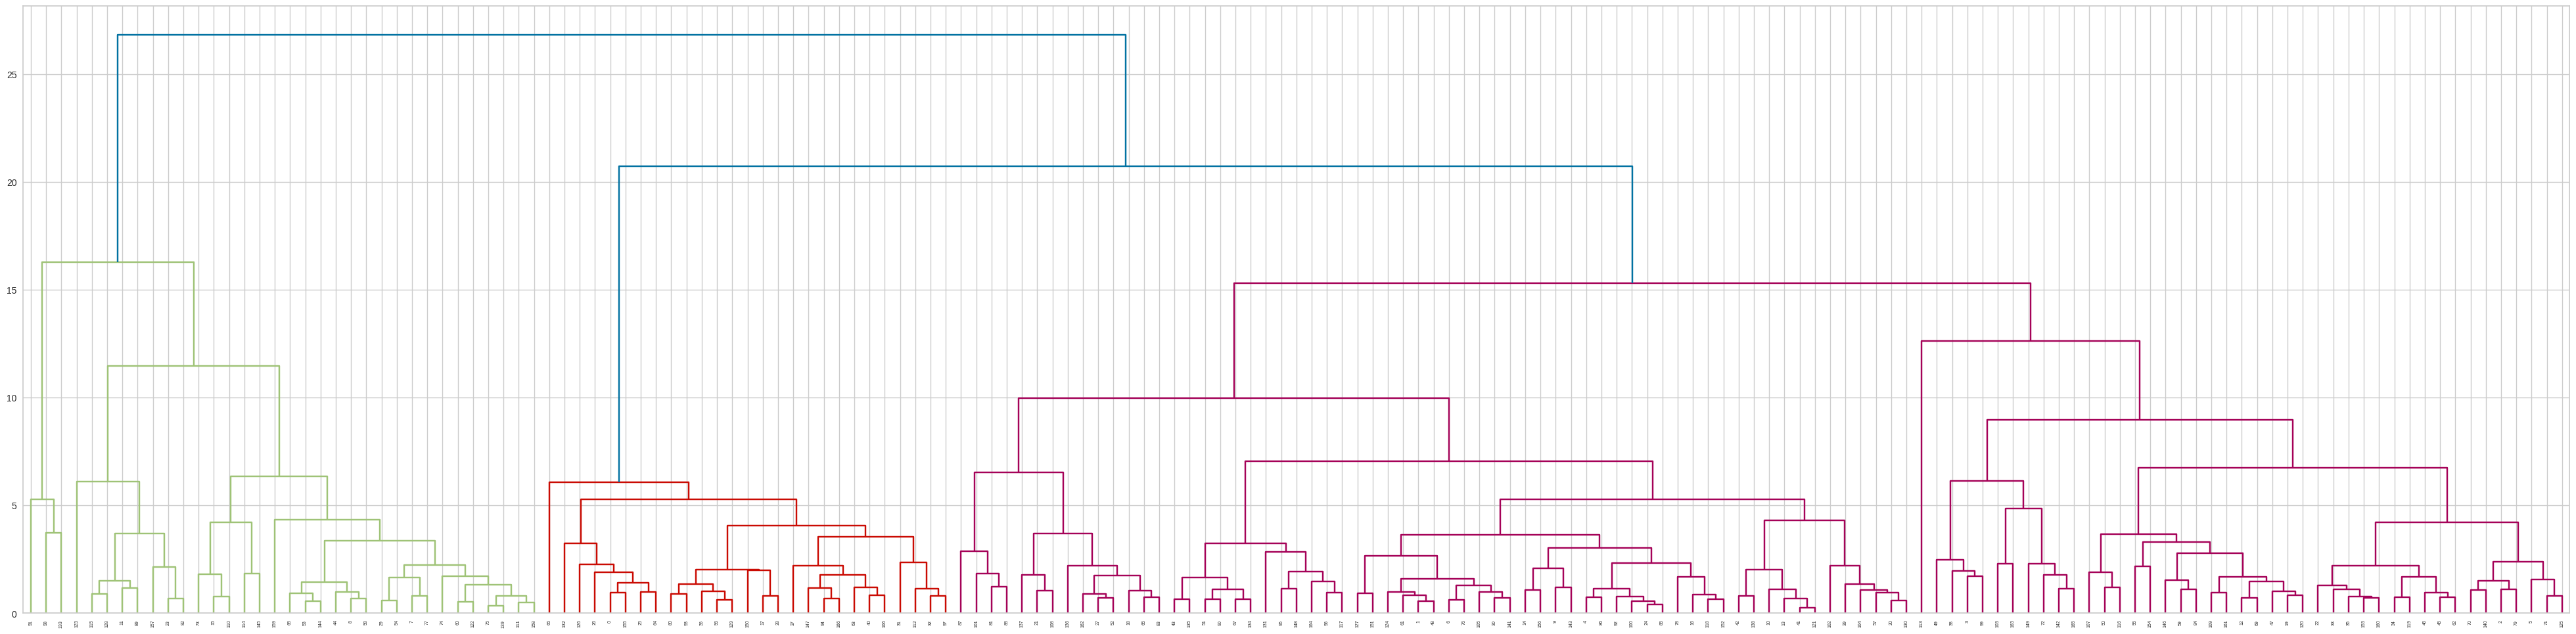

In [ ]:
plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(df_standard,method='ward'))

As we can see from the dendogram that the optimum number of cluster is 3 therefore applying **AgglomerativeClustering  **

In [ ]:
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hcluster.fit_predict(df_standard)
hcluster_label = hcluster.labels_
hcluster_df = pd.DataFrame(df2)
hcluster_df['hcluster'] = hcluster_label

In [ ]:
hcluster_df['hcluster'].value_counts()

1    106
0     34
2     27
Name: hcluster, dtype: int64

In [ ]:
hcluster_df_n=hcluster_df.drop(['country'], axis =1)

In [ ]:
hcluster_df_n

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  hcluster  
0         5.82    553         2  
1         1.65   4090         1  
2         2.89   4460         1  
3         6.16   3530         1  
4         2.13  12200         1  
..         ...    ...       ...  
162       3.50   2970         1  
163       2.47  13500         1  
164       1.95   1310         1  
165       4.67   1310         1  
166       5.40   1460         2  

[167 rows x 10 columns]

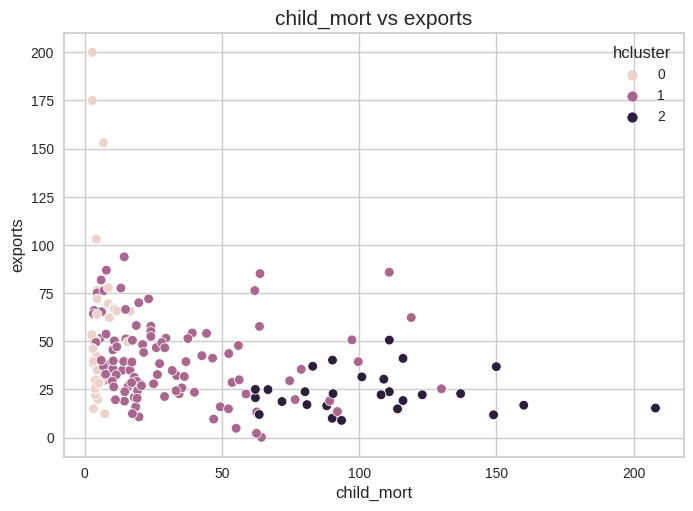

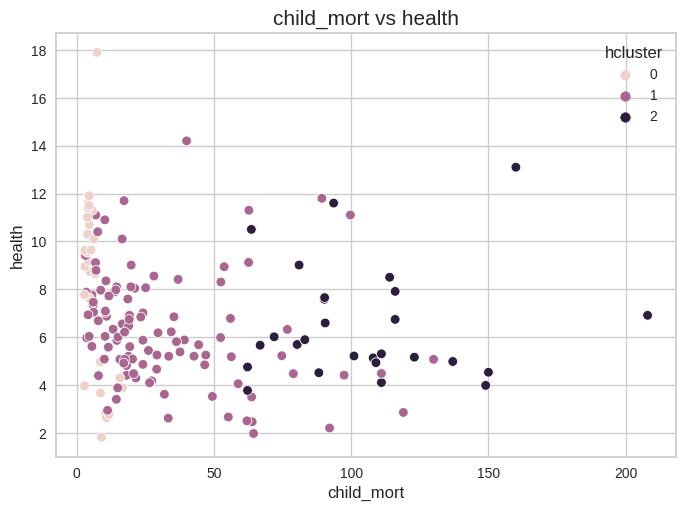

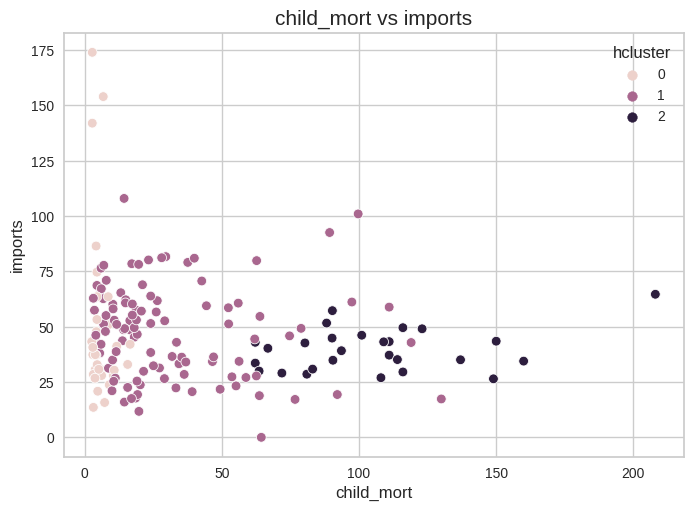

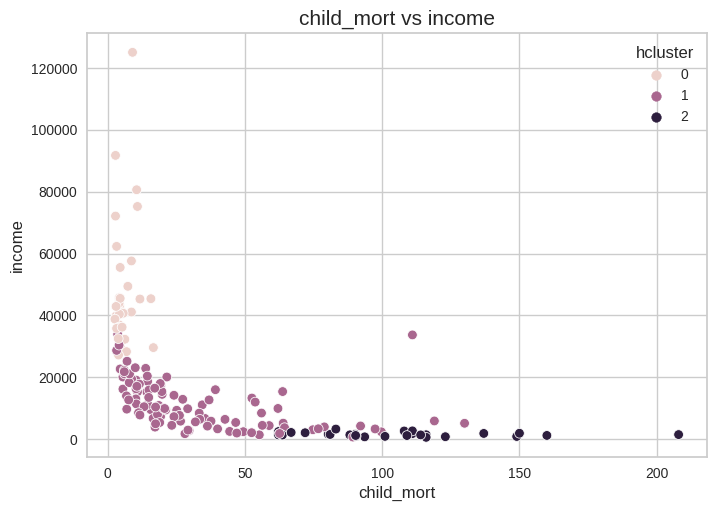

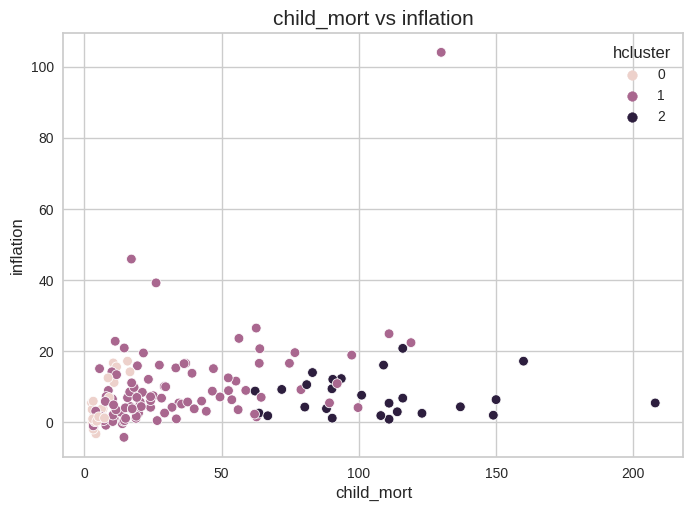

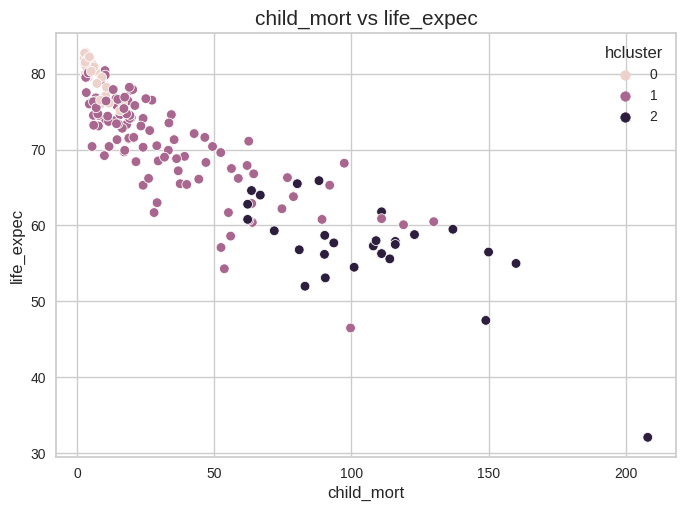

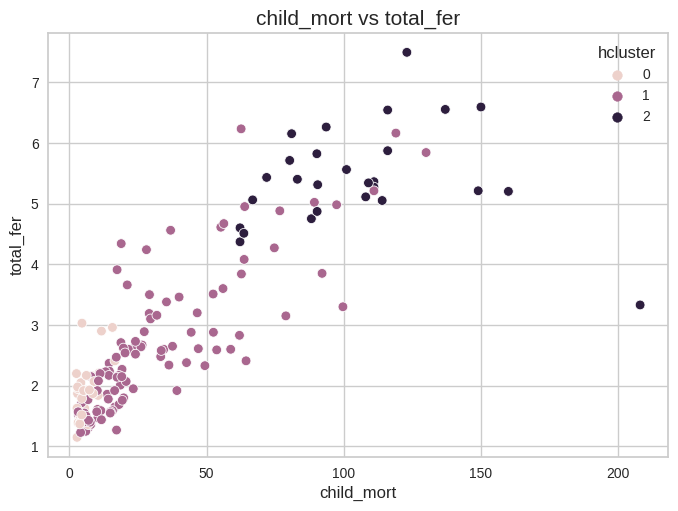

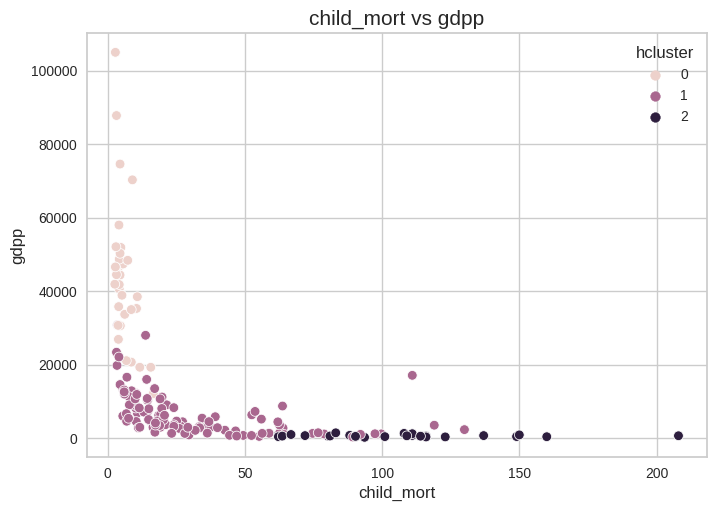

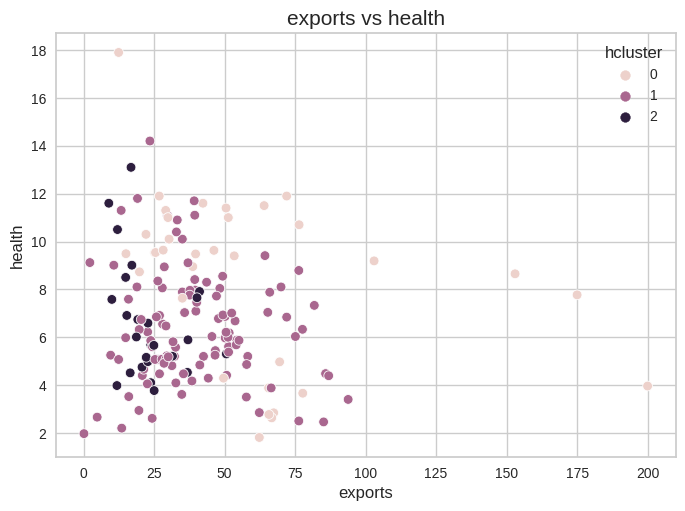

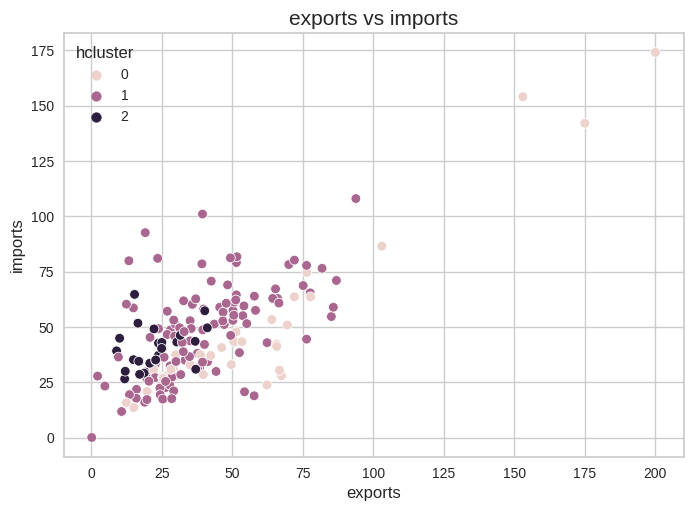

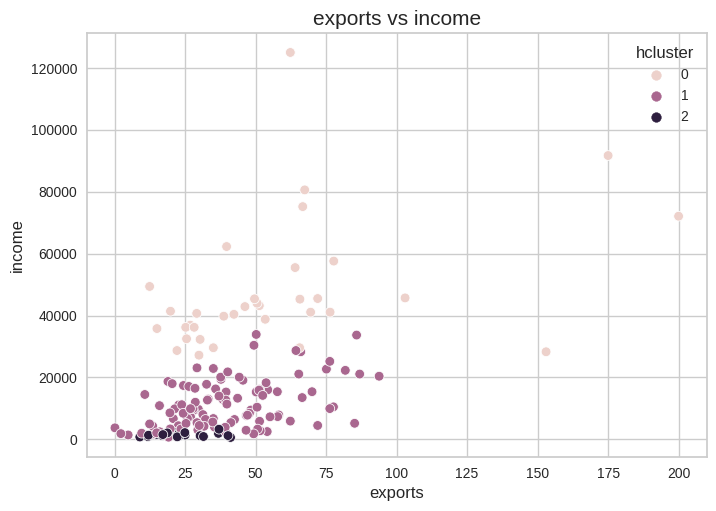

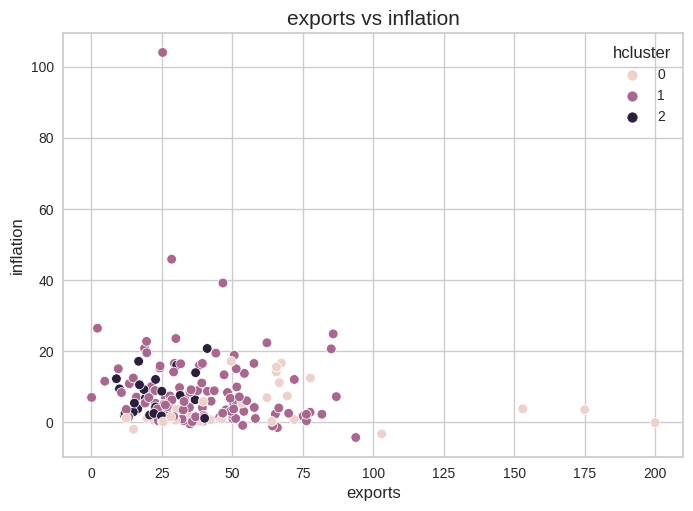

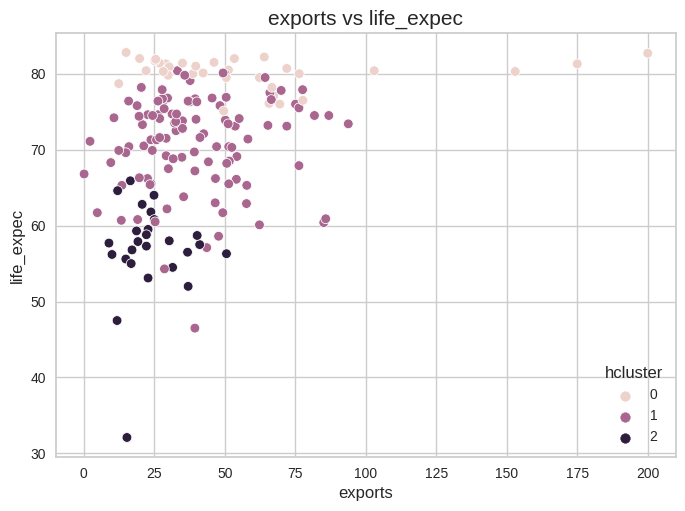

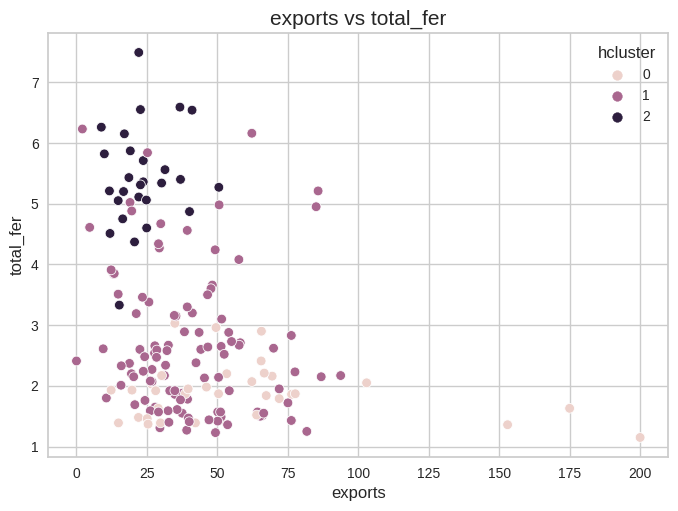

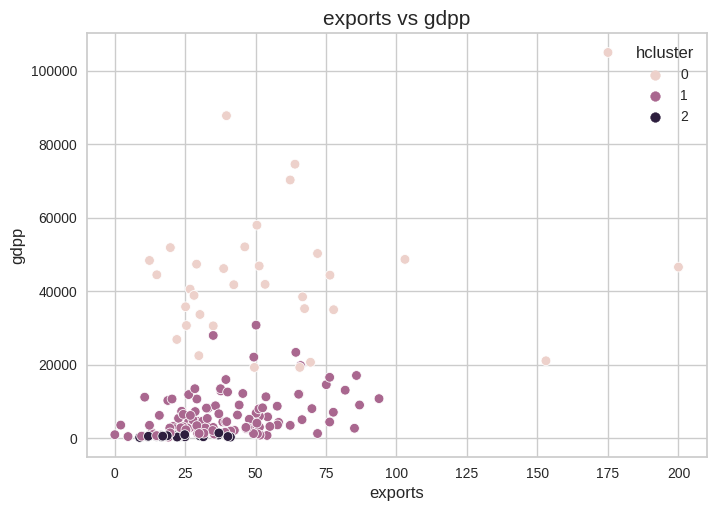

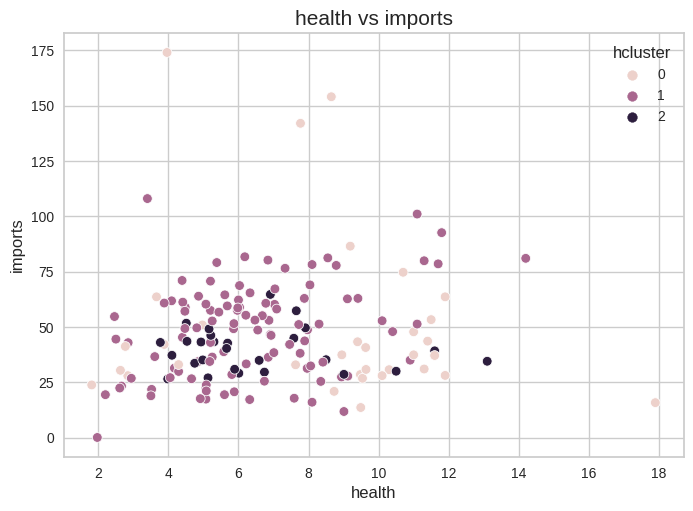

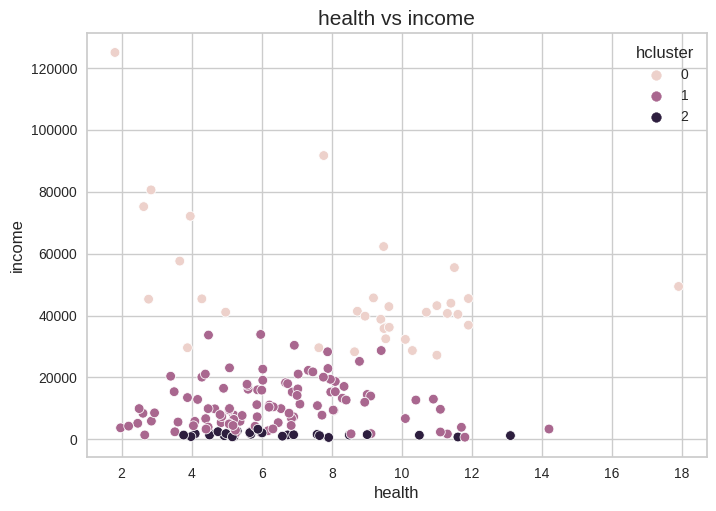

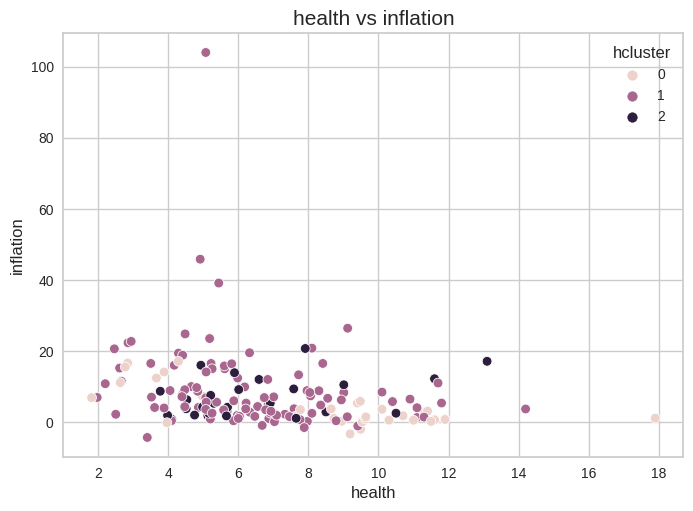

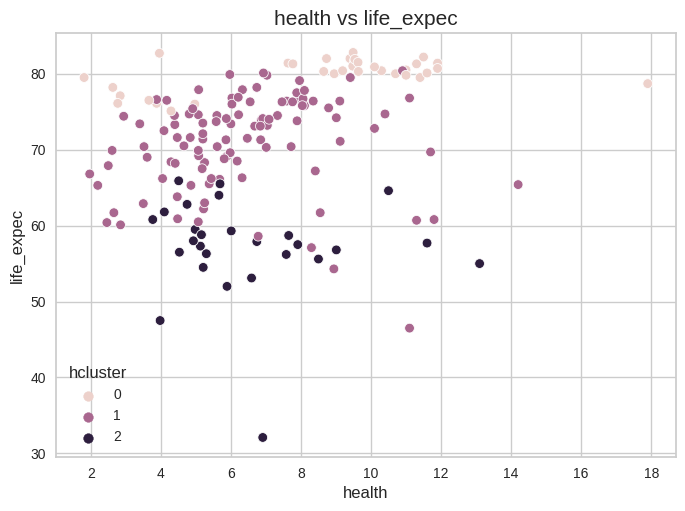

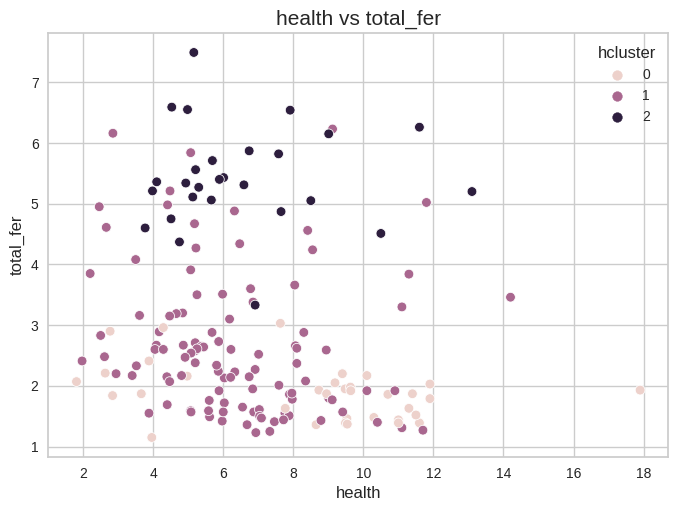

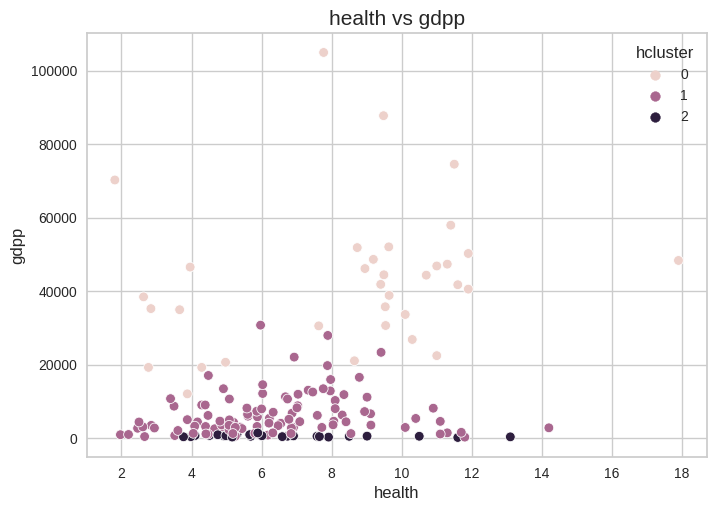

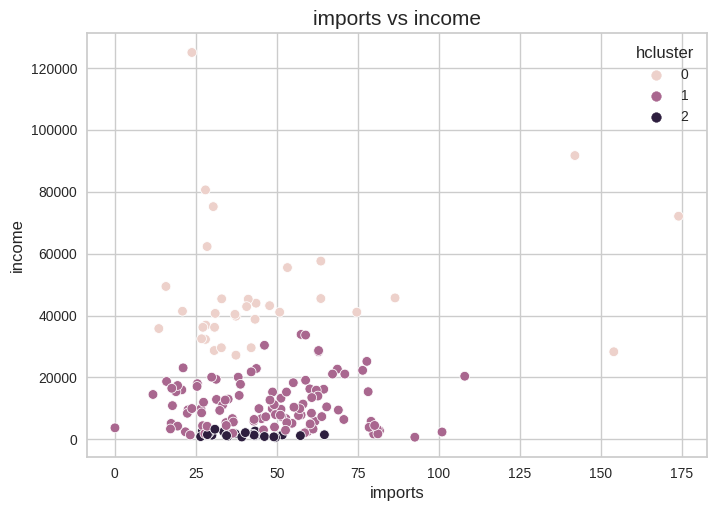

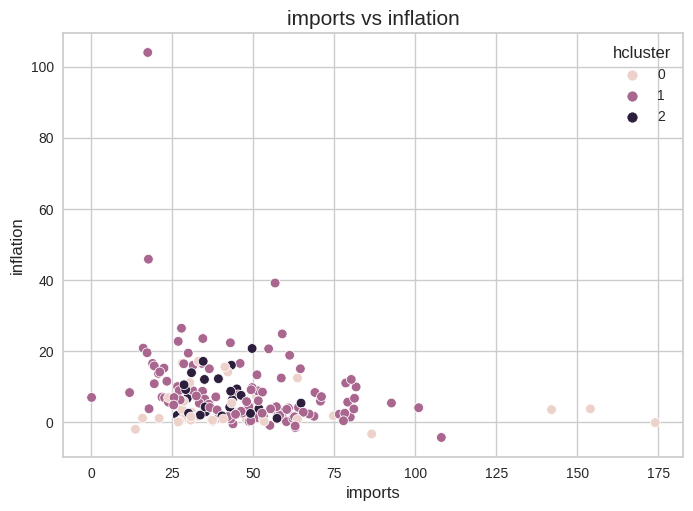

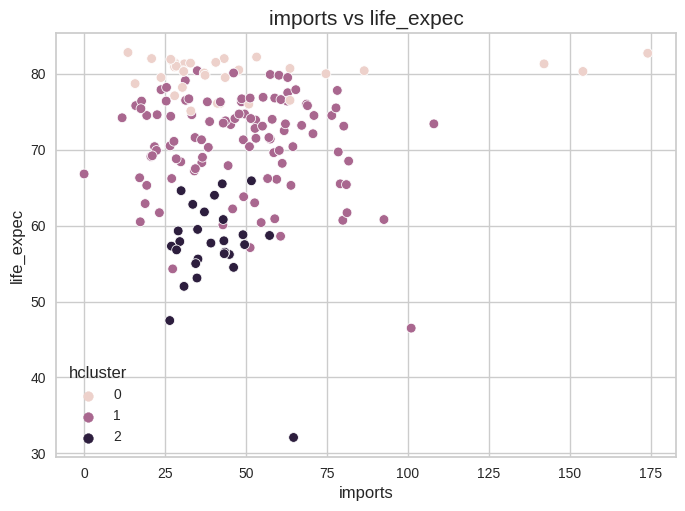

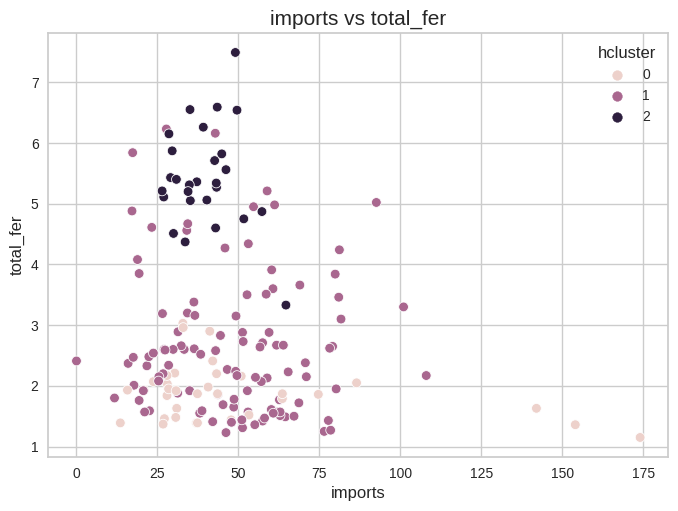

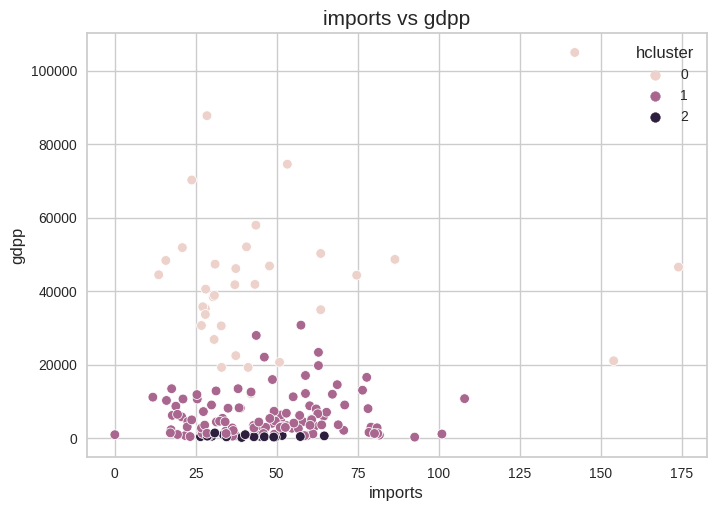

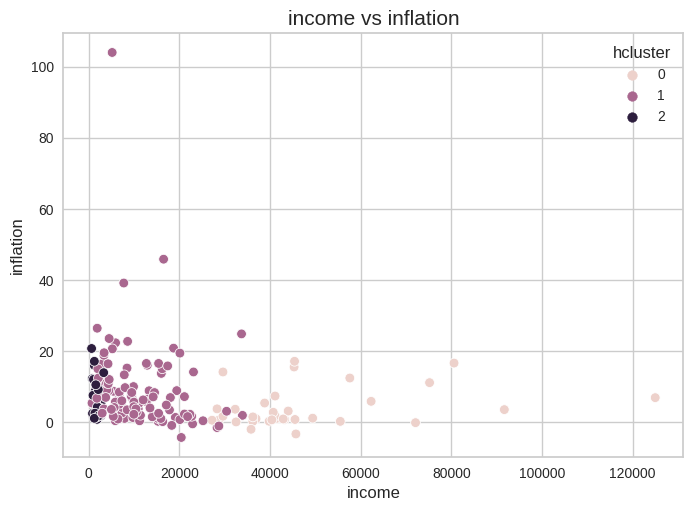

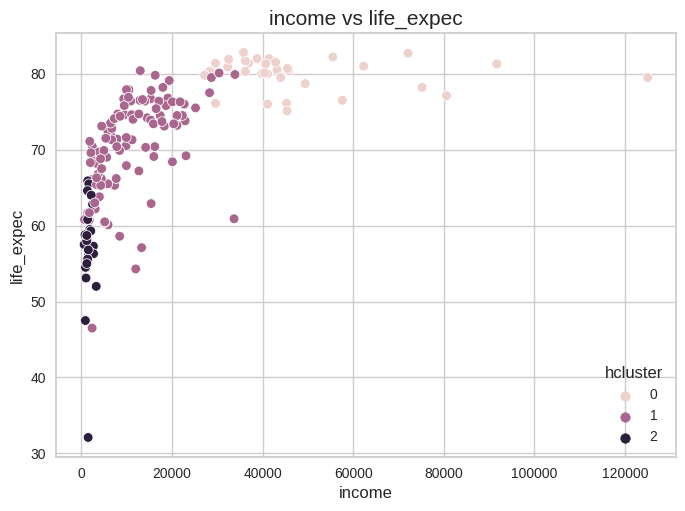

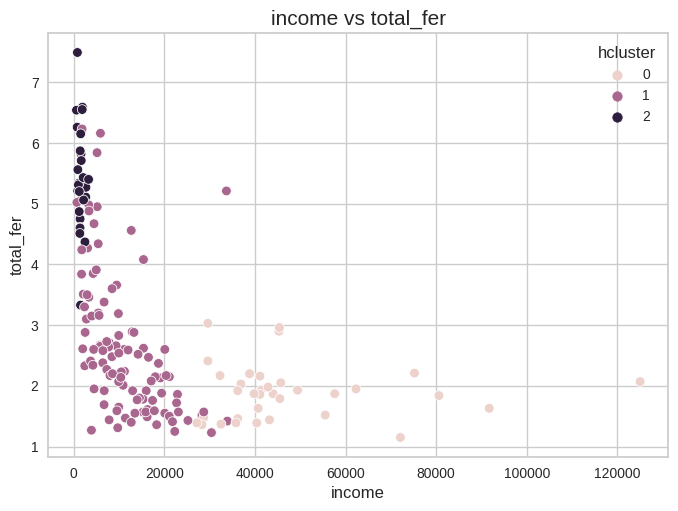

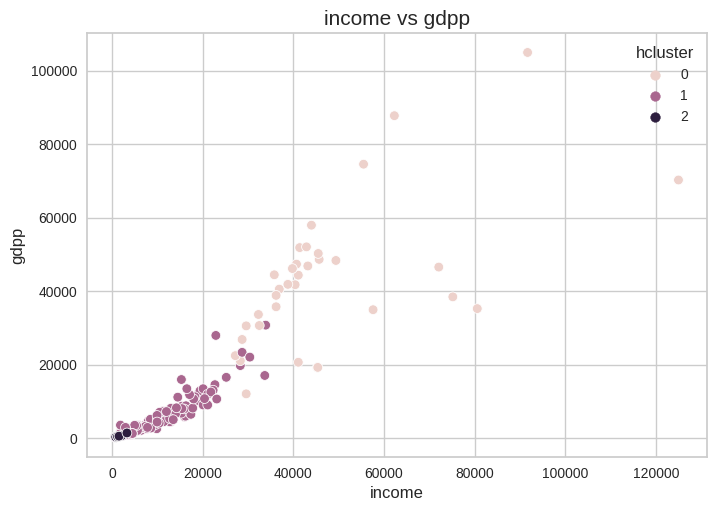

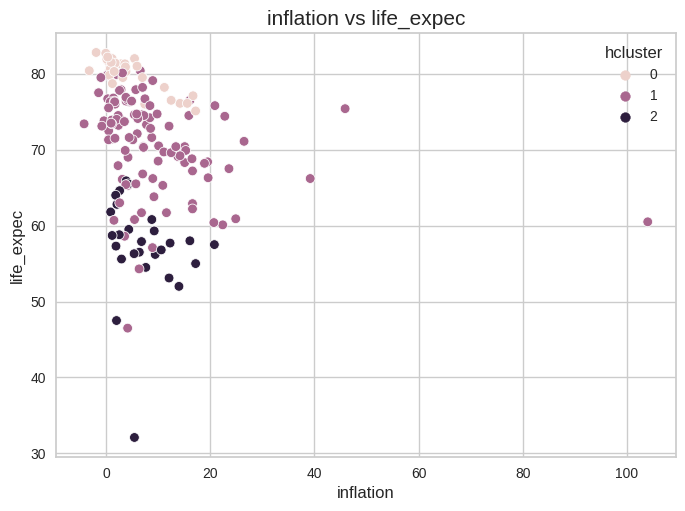

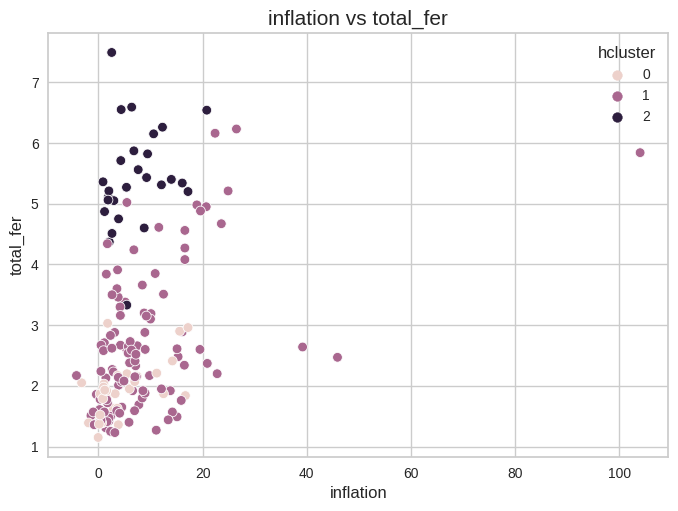

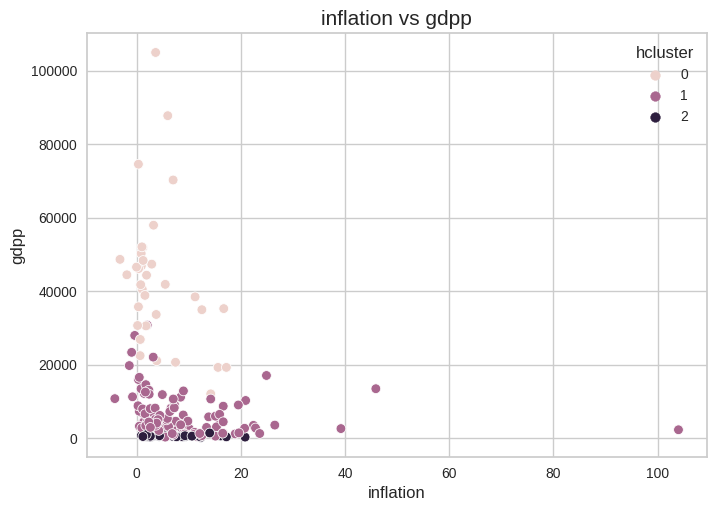

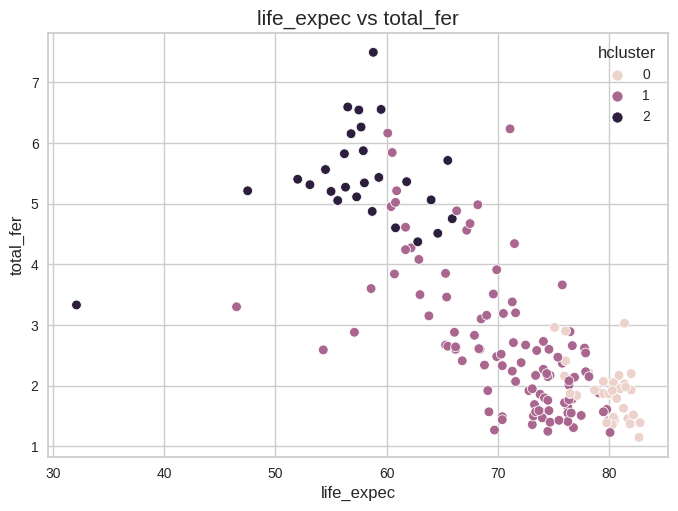

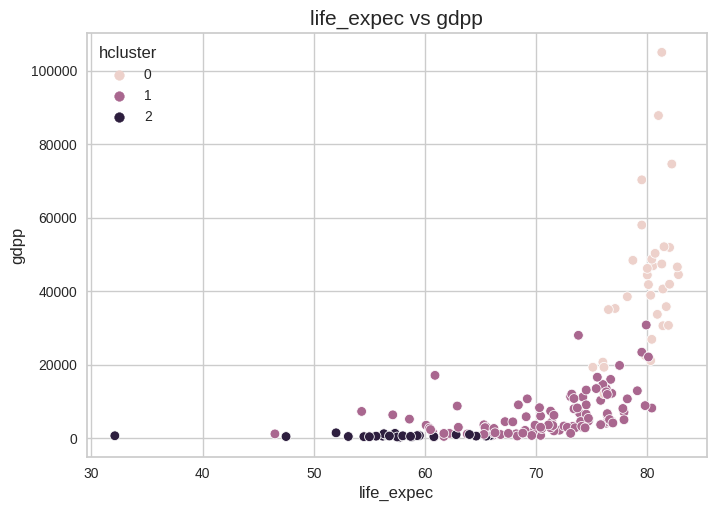

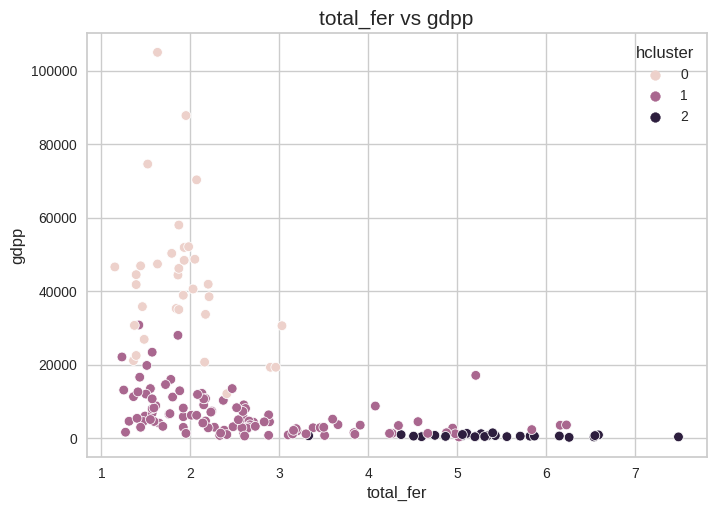

In [ ]:
for i in range(9):
  for  j in range(i+1,9):
    sns.scatterplot(x=hcluster_df_n.iloc[:, i], y=hcluster_df_n.iloc[:, j], hue='hcluster', data=hcluster_df_n)
    plt.title(hcluster_df_n.columns[i]+" vs "+hcluster_df_n.columns[j], fontsize=15)
    plt.xlabel(hcluster_df_n.columns[i], fontsize=12)
    plt.ylabel(hcluster_df_n.columns[j], fontsize=12)
    plt.show()

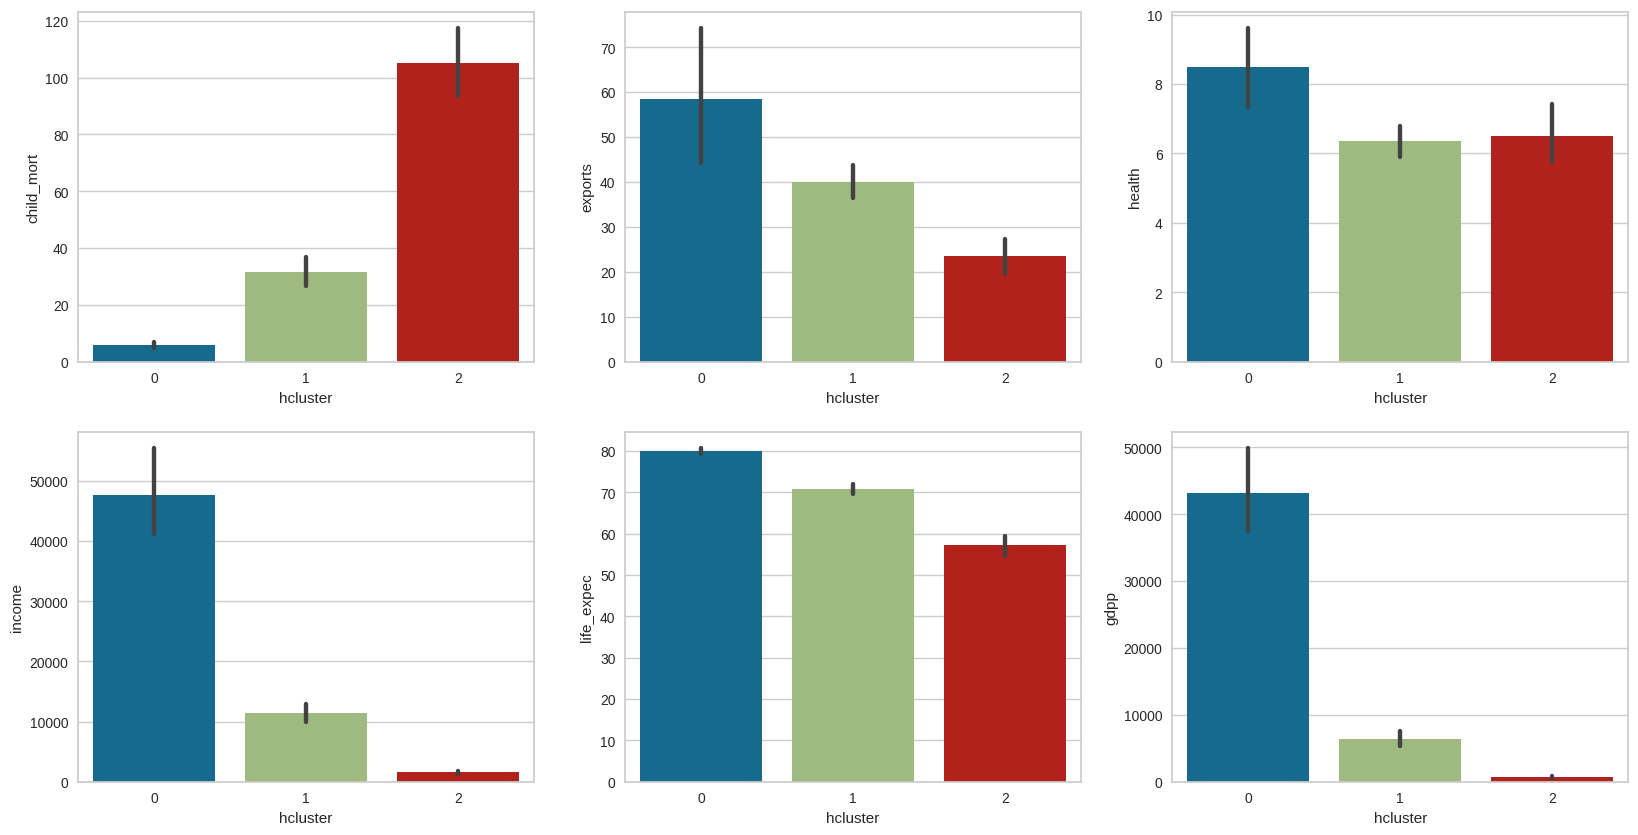

In [ ]:
fig,ax = plt.subplots(2,3, figsize=(20,10),squeeze=False)
sns.barplot(x='hcluster', y=hcluster_df_n.columns[0],data=hcluster_df_n,ax=ax[0,0])
sns.barplot(x='hcluster', y=hcluster_df_n.columns[1],data=hcluster_df_n,ax=ax[0,1])
sns.barplot(x='hcluster', y=hcluster_df_n.columns[2],data=hcluster_df_n,ax=ax[0,2])
sns.barplot(x='hcluster', y=hcluster_df_n.columns[4],data=hcluster_df_n,ax=ax[1,0])
sns.barplot(x='hcluster', y=hcluster_df_n.columns[6],data=hcluster_df_n,ax=ax[1,1])
sns.barplot(x='hcluster', y=hcluster_df_n.columns[8],data=hcluster_df_n,ax=ax[1,2])

plt.show()

Class 2 is in need of funds

Class 1 can need funds but are better than class 2

Class 0 are developed countries that may not need ant funds

In [ ]:
under_developing_h=hcluster_df[hcluster_df_n['hcluster']==2]['country']
developing_h=hcluster_df[hcluster_df_n['hcluster']==1]['country']
developed_h=hcluster_df[hcluster_df_n['hcluster']==0]['country']

In [ ]:
under_developing_h

0                   Afghanistan
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
40                Cote d'Ivoire
56                       Gambia
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
93                   Madagascar
94                       Malawi
97                         Mali
106                  Mozambique
112                       Niger
126                      Rwanda
129                     Senegal
132                Sierra Leone
147                    Tanzania
150                        Togo
155                      Uganda
166                      Zambia
Name: country, dtype: object

In [ ]:
developing_h

1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
5                Argentina
              ...         
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
Name: country, Length: 106, dtype: object

In [ ]:
developed_h

7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
89                    Libya
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
115                    Oman
122                Portugal
123                   Qatar
128            Saudi Arabia
133               Singapore
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

In [ ]:
hcluster_df_copy=hcluster_df.copy()

In [ ]:
hcluster_df_copy['hcluster'].loc[hcluster_df_copy['hcluster'] == 0] = 'No Help Needed'
hcluster_df_copy['hcluster'].loc[hcluster_df_copy['hcluster'] == 1] = 'Might need help'
hcluster_df_copy['hcluster'].loc[hcluster_df_copy['hcluster'] == 2] = 'Need Help'
fig = px.choropleth(hcluster_df_copy[['country','hcluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = hcluster_df_copy['hcluster'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

# Hirerarchial on PCA dataset

In [ ]:
df_1=df.copy()

In [ ]:
plt.figure(figsize=(50, 12))
dend0=hcluster.dendrogram(hcluster.linkage(data_pca,method='ward'))

AttributeError: ignored

<Figure size 5000x1200 with 0 Axes>

:The dendogram shows that number of optimal cluster is 3

In [ ]:
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hcluster.fit_predict(data_pca)
hcluster_label_pca= hcluster.labels_
hcluster_df_pca = pd.DataFrame(df_1)
hcluster_df_pca['hcluster'] = hcluster_label_pca

In [ ]:
hcluster_df_pca_n=hcluster_df_pca.drop(['country'], axis =1)

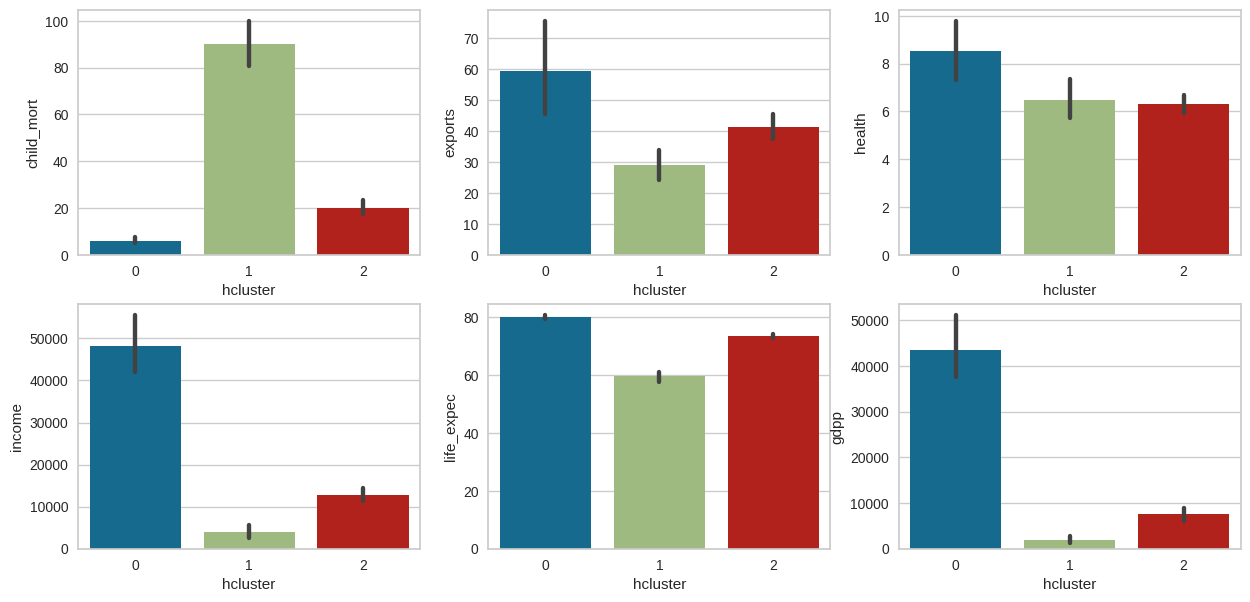

In [ ]:
fig,ax = plt.subplots(2,3, figsize=(15,7),squeeze=False)
sns.barplot(x='hcluster', y=hcluster_df_pca_n.columns[0],data=hcluster_df_pca_n,ax=ax[0,0])
sns.barplot(x='hcluster', y=hcluster_df_pca_n.columns[1],data=hcluster_df_pca_n,ax=ax[0,1])
sns.barplot(x='hcluster', y=hcluster_df_pca_n.columns[2],data=hcluster_df_pca_n,ax=ax[0,2])
sns.barplot(x='hcluster', y=hcluster_df_pca_n.columns[4],data=hcluster_df_pca_n,ax=ax[1,0])
sns.barplot(x='hcluster', y=hcluster_df_pca_n.columns[6],data=hcluster_df_pca_n,ax=ax[1,1])
sns.barplot(x='hcluster', y=hcluster_df_pca_n.columns[8],data=hcluster_df_pca_n,ax=ax[1,2])

plt.show()

We can see from the above bar plot that cluster containing class 1 is the cluster that needs the most help

In [ ]:
hcluster_df_pca[hcluster_df_pca['hcluster'] == 0]

country  child_mort  exports  health  imports  income  \
7               Australia         4.8     19.8    8.73     20.9   41400   
8                 Austria         4.3     51.3   11.00     47.8   43200   
11                Bahrain         8.6     69.5    4.97     50.9   41100   
15                Belgium         4.5     76.4   10.70     74.7   41100   
23                 Brunei        10.5     67.4    2.84     28.0   80600   
29                 Canada         5.6     29.1   11.30     31.0   40700   
44                Denmark         4.1     50.5   11.40     43.6   44000   
53                Finland         3.0     38.7    8.95     37.4   39800   
54                 France         4.2     26.8   11.90     28.1   36900   
58                Germany         4.2     42.3   11.60     37.1   40400   
60                 Greece         3.9     22.1   10.30     30.7   28700   
68                Iceland         2.6     53.4    9.40     43.3   38800   
73                Ireland         4.2    103.0    9.19     86.5   45700   
75                  Italy         4.0     25.2    9.53     27.2   36200   
77                  Japan         3.2     15.0    9.49     13.6   35800   
82                 Kuwait        10.8     66.7    2.63     30.4   75200   
89                  Libya        16.6     65.6    3.88     42.1   29600   
91             Luxembourg         2.8    175.0    7.77    142.0   91700   
98                  Malta         6.8    153.0    8.65    154.0   28300   
110           Netherlands         4.5     72.0   11.90     63.6   45500   
111           New Zealand         6.2     30.3   10.10     28.0   32300   
114                Norway         3.2     39.7    9.48     28.5   62300   
115                  Oman        11.7     65.7    2.77     41.2   45300   
122              Portugal         3.9     29.9   11.00     37.4   27200   
123                 Qatar         9.0     62.3    1.81     23.8  125000   
128          Saudi Arabia        15.7     49.6    4.29     33.0   45400   
133             Singapore         2.8    200.0    3.96    174.0   72100   
139                 Spain         3.8     25.5    9.54     26.8   32500   
144                Sweden         3.0     46.2    9.63     40.7   42900   
145           Switzerland         4.5     64.0   11.50     53.3   55500   
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   
158        United Kingdom         5.2     28.2    9.64     30.8   36200   
159         United States         7.3     12.4   17.90     15.8   49400   

     inflation  life_expec  total_fer    gdpp  hcluster  
7        1.160        82.0       1.93   51900         0  
8        0.873        80.5       1.44   46900         0  
11       7.440        76.0       2.16   20700         0  
15       1.880        80.0       1.86   44400         0  
23      16.700        77.1       1.84   35300         0  
29       2.870        81.3       1.63   47400         0  
44       3.220        79.5       1.87   58000         0  
53       0.351        80.0       1.87   46200         0  
54       1.050        81.4       2.03   40600         0  
58       0.758        80.1       1.39   41800         0  
60       0.673        80.4       1.48   26900         0  
68       5.470        82.0       2.20   41900         0  
73      -3.220        80.4       2.05   48700         0  
75       0.319        81.7       1.46   35800         0  
77      -1.900        82.8       1.39   44500         0  
82      11.200        78.2       2.21   38500         0  
89      14.200        76.1       2.41   12100         0  
91       3.620        81.3       1.63  105000         0  
98       3.830        80.3       1.36   21100         0  
110      0.848        80.7       1.79   50300         0  
111      3.730        80.9       2.17   33700         0  
114      5.950        81.0       1.95   87800         0  
115     15.600        76.1       2.90   19300         0  
122      0.643        79.8       1.39   22500         0  
123      6.980   

In [ ]:
hcluster_df_pca[hcluster_df_pca['hcluster'] == 1]

country  child_mort  exports  health   imports  income  \
0                 Afghanistan        90.2   10.000    7.58   44.9000    1610   
3                      Angola       119.0   62.300    2.85   42.9000    5900   
17                      Benin       111.0   23.800    4.10   37.2000    1820   
21                   Botswana        52.5   43.600    8.30   51.3000   13300   
25               Burkina Faso       116.0   19.200    6.74   29.6000    1430   
26                    Burundi        93.6    8.920   11.60   39.2000     764   
28                   Cameroon       108.0   22.200    5.13   27.0000    2660   
31   Central African Republic       149.0   11.800    3.98   26.5000     888   
32                       Chad       150.0   36.800    4.53   43.5000    1930   
36                    Comoros        88.2   16.500    4.51   51.7000    1410   
37           Congo, Dem. Rep.       116.0   41.100    7.91   49.6000     609   
38                Congo, Rep.        63.9   85.100    2.46   54.7000    5190   
40              Cote d'Ivoire       111.0   50.600    5.30   43.3000    2690   
49          Equatorial Guinea       111.0   85.800    4.48   58.9000   33700   
50                    Eritrea        55.2    4.790    2.66   23.3000    1420   
55                      Gabon        63.7   57.700    3.50   18.9000   15400   
56                     Gambia        80.3   23.800    5.69   42.7000    1660   
59                      Ghana        74.7   29.500    5.22   45.9000    3060   
63                     Guinea       109.0   30.300    4.93   43.2000    1190   
64              Guinea-Bissau       114.0   14.900    8.50   35.2000    1390   
66                      Haiti       208.0   15.300    6.91   64.7000    1500   
72                       Iraq        36.9   39.400    8.41   34.1000   12700   
80                      Kenya        62.2   20.700    4.75   33.6000    2480   
81                   Kiribati        62.7   13.300   11.30   79.9000    1730   
84                        Lao        78.9   35.400    4.47   49.3000    3980   
87                    Lesotho        99.7   39.400   11.10  101.0000    2380   
88                    Liberia        89.3   19.100   11.80   92.6000     700   
93                 Madagascar        62.2   25.000    3.77   43.0000    1390   
94                     Malawi        90.5   22.800    6.59   34.9000    1030   
97                       Mali       137.0   22.800    4.98   35.1000    1870   
99                 Mauritania        97.4   50.700    4.41   61.2000    3320   
101     Micronesia, Fed. Sts.        40.0   23.500   14.20   81.0000    3340   
106                Mozambique       101.0   31.500    5.21   46.2000     918   
107                   Myanmar        64.4    0.109    1.97    0.0659    3720   
108                   Namibia        56.0   47.800    6.78   60.7000    8460   
112                     Niger       123.0   22.200    5.16   49.1000     814   
113                   Nigeria       130.0   25.300    5.07   17.4000    5150   
116                  Pakistan        92.1   13.500    2.20   19.4000    4280   
126                    Rwanda        63.6   12.000   10.50   30.0000    1350   
129                   Senegal        66.8   24.900    5.66   40.3000    2180   
132              Sierra Leone       160.0   16.800   13.10   34.5000    1220   
136           Solomon Islands        28.1   49.300    8.55   81.2000    1780   
137              South Africa        53.7   28.600    8.94   27.4000   12000   
142                     Sudan        76.7   19.700    6.32   17.2000    3370   
147                  Tanzania        71.9   18.700    6.01   29.1000    2090   
149               Timor-Leste        62.6    2.200    9.12   27.8000    1850   
150                      Togo        90.3   40.200    7.65   57.3000    1210   
155                    Uganda        81.0   17.100    9.01   28.6000    1540   
165                     Yemen        56.3   30.000    5.18   34.4000    4480   
166                   

In [ ]:
hcluster_df_pca[hcluster_df_pca['hcluster'] == 2]

country  child_mort  exports  health  imports  income  \
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
5              Argentina        14.5     18.9    8.10     16.0   18700   
6                Armenia        18.1     20.8    4.40     45.3    6700   
..                   ...         ...      ...     ...      ...     ...   
160              Uruguay        10.6     26.3    8.35     25.4   17100   
161           Uzbekistan        36.3     31.7    5.81     28.5    4240   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   

     inflation  life_expec  total_fer   gdpp  hcluster  
1         4.49        76.3       1.65   4090         2  
2        16.10        76.5       2.89   4460         2  
4         1.44        76.8       2.13  12200         2  
5        20.90        75.8       2.37  10300         2  
6         7.77        73.3       1.69   3220         2  
..         ...         ...        ...    ...       ...  
160       4.91        76.4       2.08  11900         2  
161      16.50        68.8       2.34   1380         2  
162       2.62        63.0       3.50   2970         2  
163      45.90        75.4       2.47  13500         2  
164      12.10        73.1       1.95   1310         2  

[84 rows x 11 columns]

CLASS 0- DEVELOPED

CLASS-1 UNDER DEVELOPED

CLASS 2 DEVELOPING

In [ ]:
hcluster_df_pca['hcluster'].loc[hcluster_df_pca['hcluster'] == 1] = 'Help Needed'
hcluster_df_pca['hcluster'].loc[hcluster_df_pca['hcluster'] == 2] = 'Might need help'
hcluster_df_pca['hcluster'].loc[hcluster_df_pca['hcluster'] == 0] = 'No need'
fig = px.choropleth(hcluster_df_pca[['country','hcluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = hcluster_df_pca['hcluster'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

# DBSCAN

In [ ]:
df3=df.copy()

In [ ]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(df_standard)
distances, indices = neighbors_fit.kneighbors(df_standard)


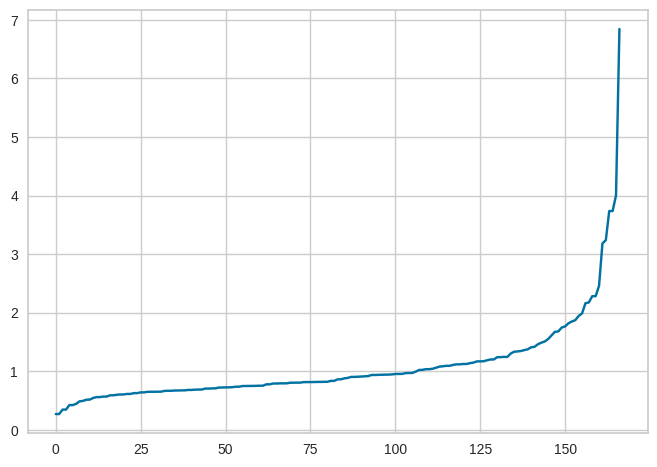

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
dbscan = DBSCAN(eps=1.3, min_samples=15)
labels = dbscan.fit_predict(df_standard)
dbs_df = pd.DataFrame(df3)
dbs_df['dbcluster'] = labels
dbs_df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  dbcluster  
0         9.44        56.2       5.82    553         -1  
1         4.49        76.3       1.65   4090          0  
2        16.10        76.5       2.89   4460          0  
3        22.40        60.1       6.16   3530         -1  
4         1.44        76.8       2.13  12200          0  
..         ...         ...        ...    ...        ...  
162       2.62        63.0       3.50   2970          0  
163      45.90        75.4       2.47  13500         -1  
164      12.10        73.1       1.95   1310         -1  
165      23.60        67.5       4.67   1310         -1  
166      14.00        52.0       5.40   1460         -1  

[167 rows x 11 columns]

In [ ]:
dbs_df['dbcluster'].nunique()

3

In [ ]:
dbs_df_n=dbs_df.drop(['country'], axis =1)

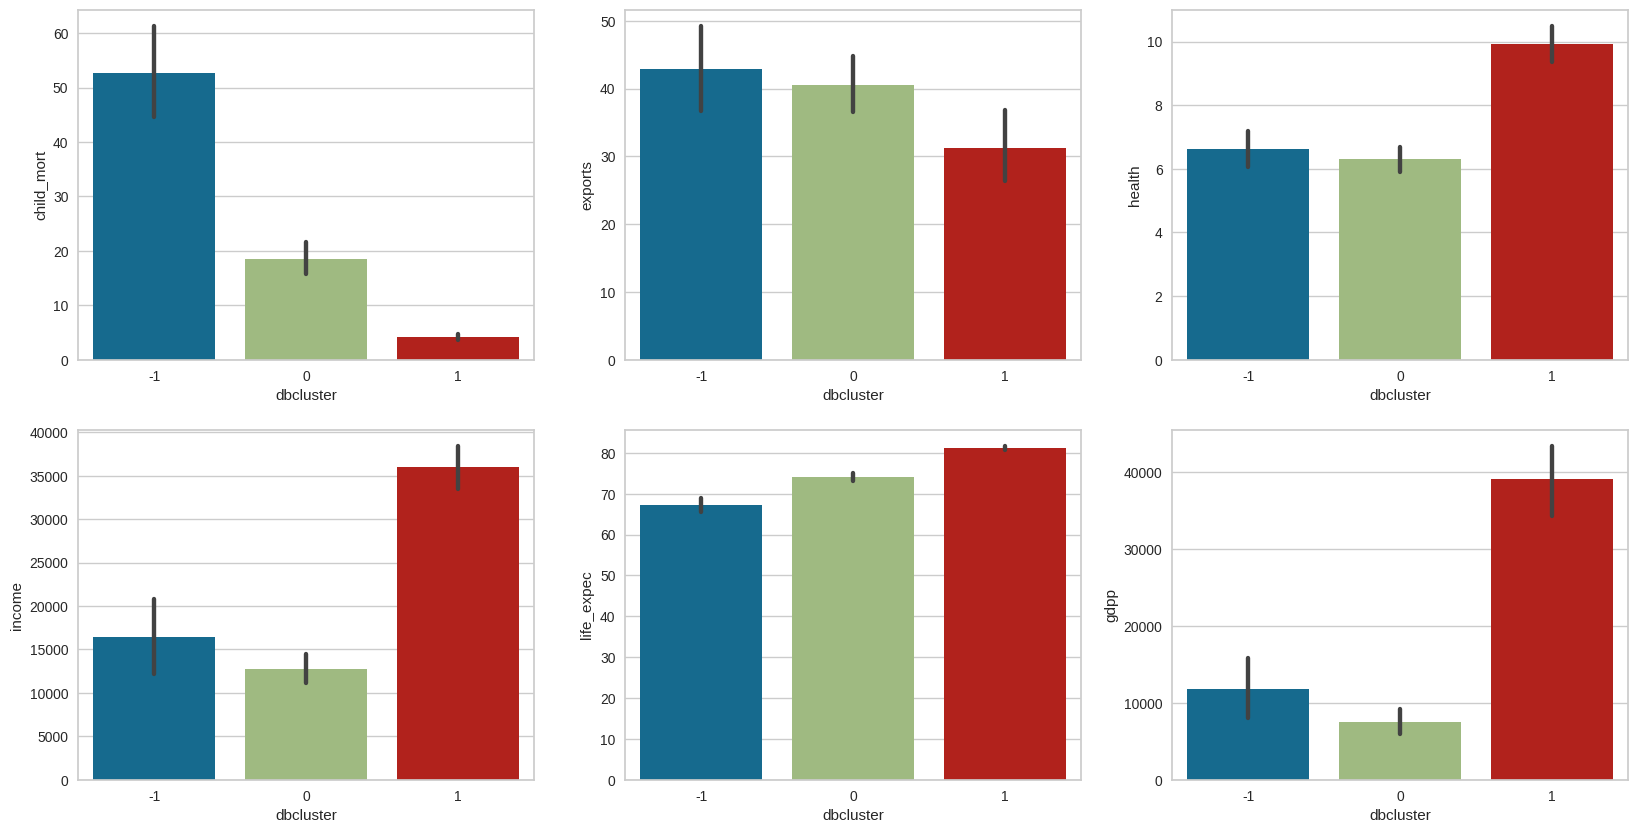

In [ ]:
fig,ax = plt.subplots(2,3, figsize=(20,10),squeeze=False)
sns.barplot(x='dbcluster', y=dbs_df_n.columns[0],data=dbs_df_n,ax=ax[0,0])
sns.barplot(x='dbcluster', y=dbs_df_n.columns[1],data=dbs_df_n,ax=ax[0,1])
sns.barplot(x='dbcluster', y=dbs_df_n.columns[2],data=dbs_df_n,ax=ax[0,2])
sns.barplot(x='dbcluster', y=dbs_df_n.columns[4],data=dbs_df_n,ax=ax[1,0])
sns.barplot(x='dbcluster', y=dbs_df_n.columns[6],data=dbs_df_n,ax=ax[1,1])
sns.barplot(x='dbcluster', y=dbs_df_n.columns[8],data=dbs_df_n,ax=ax[1,2])
plt.show()

In [ ]:
under_developed=dbs_df[dbs_df['dbcluster']==-1]['country']
developing=dbs_df[dbs_df['dbcluster']==0]['country']
developed=dbs_df[dbs_df['dbcluster']==1]['country']

In [ ]:
under_developed

0      Afghanistan
3           Angola
5        Argentina
8          Austria
9       Azerbaijan
          ...     
161     Uzbekistan
163      Venezuela
164        Vietnam
165          Yemen
166         Zambia
Name: country, Length: 103, dtype: object

In [ ]:
developing

1                             Albania
2                             Algeria
4                 Antigua and Barbuda
6                             Armenia
10                            Bahamas
13                           Barbados
16                             Belize
18                             Bhutan
19                            Bolivia
24                           Bulgaria
27                           Cambodia
30                         Cape Verde
33                              Chile
34                              China
35                           Colombia
41                            Croatia
43                     Czech Republic
45                 Dominican Republic
46                            Ecuador
47                              Egypt
48                        El Salvador
51                            Estonia
52                               Fiji
61                            Grenada
62                          Guatemala
76                            Jamaica
85          

In [ ]:
developed

7           Australia
29             Canada
53            Finland
54             France
58            Germany
60             Greece
68            Iceland
74             Israel
75              Italy
77              Japan
111       New Zealand
122          Portugal
139             Spain
144            Sweden
158    United Kingdom
Name: country, dtype: object

In [ ]:
dbs_df_copy=dbs_df.copy()

In [ ]:
dbs_df_copy['dbcluster'].loc[dbs_df_copy['dbcluster'] == -1] = 'Help Needed'
dbs_df_copy['dbcluster'].loc[dbs_df_copy['dbcluster'] == 0] = 'Might need help'
dbs_df_copy['dbcluster'].loc[dbs_df_copy['dbcluster'] == 1] = 'No need of Help'
fig = px.choropleth(dbs_df_copy[['country','dbcluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = dbs_df_copy['dbcluster'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')